<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="Indigo" size=6px>
                  <b> Capstone Project <br>Makaan Properties - Price Prediction </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Contents:


1. **[Data Introduction](#Intro)**
    - 1.1 [Data Description](#Desc)
    - 1.2 [Data Importing and Overview](#Import)
    - 1.3 [Checking Shape of Data](#Shape)
    - 1.4 [Checking Data Types](#Type)
    <br><br>
2. **[EDA (Exploratory Data Analysis)](#EDA)**
    - 2.1 [Checking for Statistical Values](#Describe)
    - 2.2 [Checking for Null Values and their Percentages](#Null)
        - 2.2.1 [Visualizing Null Values (Before Treatment)](#Null_visualize)
        - 2.2.2 [Null Values Treatment](#Null_treatment)
        - 2.2.3 [Visualizing Null Values (After Treatment)](#Nulls)
    - 2.3 [Data Cleaning for Numeric Variables](#NumV)
    - 2.4 [Check for Duplicates](#Duplicates)
    - 2.5 [Check for Skewness and Standard Deviation](#Sk)
    - 2.6 [Scatter Plot Numeric Variables](#NumS)
    - 2.7 [Checking for the Outliers (Boxplot)](#Outliers)
    <br><br>
3. **[Feature_Engineering](#Feature_Engineering)**
    - 3.1 [Univariate Analysis](#UniV)
        - 3.1.1 [Count plot for Categorical Variables](#Count)
        - 3.1.2 [Kde plots for Numeric Variables](#Kdes)
    - 3.2 [Bi-variate and Multivariate Analysis](#Bi)
        - 3.2.1 [Average Prices in the Cities](#City_Price)
        - 3.2.2 [Correlation between the Variables](#Corr)
        - 3.2.3 [Categories' Count with respect to City](#wrtCity)
        - 3.2.4 [Top 10 Localitites and Sub-Urbans](#Top10)
        - 3.2.5 [Prices with respect to Property Building Status](#PPbs)
    <br><br>
4. **[Statistical Tests](#Stats)**
    - 4.1 [Chi Square Test for Independence](#Chi2)
    - 4.2 [TTest for Independence of the Variables](#ttest)
    - 4.3 [Kruskal Test for Significant Difference](#Krus)
    - 4.4 [Posthoc Analysis](#Posth)
    <br><br>
5. **[Model building](#Modelbuild)**
    - 5.1 [Data Preparation](#Dataprep)
    - 5.2 [Base Model Building](#basem)
    - 5.3 [Dividing Dataset by City Names](#Divide)
    - 5.4 [Categorical Variables Encoding](#Encoding)
    - 5.5 [Data Scaling](#Scale)
    - 5.6 [Trying for Different Models](#trymodel)
    - 5.7 [Model Selection](#modelselect)
    - 5.8 [Making Models for Different Cities](#makemodels)
    <br><br>
6. **[Making Pipeline](#pipe)**
    - 6.1 [Training Models for different Cities](#trainmodel)
    - 6.2 [Testing the Model Pipelines](#testmodel)

<a id='Libraries'> </a>
#### Importing Basic Necessary Libraries

In [1]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.stats.multicomp as mc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV
from scipy import stats


import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats import weightstats
import statistics
import statsmodels.stats.multicomp as mc 
import scikit_posthocs
import mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

<a id="Intro"></a>
<div align='left'>
    <font color= '#00008D' , size = 5px>
        <b> 1. Data Introduction </b>
    </font>
</div>

<a id="Desc"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 1.1 Data Description </b>
    </font>
</div>

<font color='gray'>
    <b> Property_Name : </b> <t> Name of the Property. </t> <br><br>
    <b> Property_id : </b> <t> ID Number of the Property. </t> <br><br>
    <b> Property_type : </b>  <t> Type of the Property : <i>Apartment, Independent House, Villa, Independent Floor or a Residential Plot. </i> </t> <br><br>
    <b> Property_status : </b>  <t> Status of Property : <i> Under Construction , Ready to move. </i> </t> <br><br>
    <b> Price_per_unit_area : </b>  <t> Price per unit area (sq. ft.) of the property <b>(Target Variable)</b>. </t> <br><br>
    <b> Posted_On : </b>  <t> Time when the property is posted. </t> <br><br>
    <b> Project_URL : </b>  <t> URL of the Project. </t> <br><br>
    <b> builder_id : </b>  <t> Builder's ID Number. </t> <br><br>
    <b> Builder_name : </b>  <t> Name of the Builder who built the site. </t> <br><br>
    <b> Property_building_status : </b>  <t> Status of the Property : <i> ACTIVE, UNVERIFIED or INACTIVE. </i> </t> <br><br>
    <b> City_id : </b>  <t> ID number of the City in which Property is located. </t> <br><br>
    <b> City_name : </b>  <t> Name of the City in which Property is located. </t> <br><br>
    <b> No_of_BHK : </b>  <t> Number of rooms in the Property.  </t> <br><br>
    <b> Locality_ID : </b>  <t> ID number of the Locality in which Property is located. </t> <br><br>
    <b> Locality_Name : </b>  <t> Name of the Locality in which Property is located. </t> <br><br>
    <b> Longitude : </b>  <t> Longitude of the Property. </t> <br><br>
    <b> Latitude : </b>  <t> Latitude of the Property. </t> <br><br>
    <b> Price : </b>  <t> Price of the Property. </t> <br><br>
    <b> Size : </b>  <t> Size of the Property (Area in sq. ft.). </t> <br><br>
    <b> Sub_urban_ID : </b>  <t> Sub Urban Area ID Number in which Property is located. </t> <br><br>
    <b> Sub_urban_name : </b>  <t> Sub Urban Area Name in which Property is located. </t> <br><br>
    <b> description : </b>  <t> Description of the Property. </t> <br><br>
    <b> is_furnished : </b>  <t> Is the Property furnished. </t> <br><br>
    <b> listing_domain_score : </b>  <t> The listing score of the Property. </t> <br><br>
    <b> is_plot : </b>  <t> Is the Property a Plot or not. </t> <br><br>
    <b> is_RERA_registered : </b>  <t> Is the Property RERA (Real Estate Regulatory Agency) Registered. </t> <br><br>
    <b> is_Apartment : </b>  <t> Is the Property Apartment or not. </t> <br><br>
    <b> is_ready_to_move : </b>  <t> Is the Property Ready to move or not. </t> <br><br>
    <b> is_commercial_Listing : </b>  <t> Is the Property in Commercial Listing or not. </t> <br><br>
    <b> is_PentaHouse : </b>  <t> Is the Property PentaHouse or not. </t> <br><br>
    <b> is_studio : </b>  <t> Is the Property Studio or not. </t> <br><br>
    <b> Listing_Category : </b>  <t> Selling Status of the Property. </t> <br><br>
</font>

<a id='Import'></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 1.2 Data Importing </b>
    </font>
</div>

In [3]:
data = pd.read_csv('Makaan_Properties_Buy.csv',encoding='cp1252')

In [4]:
df = data.copy()
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,description,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,1,Ahmedabad,3 BHK,51907,Bopal,72.465103,23.037386,"75,00,000","1,750 sq ft",10229,Ahmedabad West,The house is unfurnished. It has car parking. ...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,1,Ahmedabad,4 BHK,56407,Ambli,72.479668,23.027061,"2,36,88,000","3,384 sq ft",10229,Ahmedabad West,A 4 bhk property is available for sale in Kesh...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,1,Ahmedabad,3 BHK,66627,Naryanpura,72.558502,23.055193,"1,32,00,840","2,295 sq ft",10229,Ahmedabad West,It has a built-up area of 2295 sqft and is pri...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,1,Ahmedabad,2 BHK,51899,Changodar,72.454720,22.940430,"22,83,000",918 sq ft,10228,Ahmedabad South,It’s a 2 bhk multistorey apartment situated in...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,1,Ahmedabad,3 BHK,50368,Shilaj,72.477890,23.043703,"93,71,000","1,760 sq ft",10229,Ahmedabad West,A 3 bhk property is available for sale in Navk...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


<a id="Shape"> </a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 1.3 Shape of Data </b>
    </font>
</div>

In [5]:
print(f"The shape of the data is {df.shape}")

The shape of the data is (332096, 32)


Hence, we infer that our data has `332096` Rows and `32` columns.

<a id="Type"></a>
<div align='left'>
    <font color='Indigo' , size = 4px>
        <b> 1.4 Checking Data Types </b>
    </font>
</div>

In [6]:
df.dtypes

Property_Name                object
Property_id                   int64
Property_type                object
Property_status              object
Price_per_unit_area          object
Posted_On                    object
Project_URL                  object
builder_id                  float64
Builder_name                 object
Property_building_status     object
City_id                       int64
City_name                    object
No_of_BHK                    object
Locality_ID                   int64
Locality_Name                object
Longitude                   float64
Latitude                    float64
Price                        object
Size                         object
Sub_urban_ID                  int64
Sub_urban_name               object
description                  object
is_furnished                 object
listing_domain_score        float64
is_plot                        bool
is_RERA_registered             bool
is_Apartment                   bool
is_ready_to_move            

<a id="EDA"></a>
<div align='left'>
    <font color='#00008D' , size = 5px>
        <b> 2. EDA (Exploratory Data Analysis) </b>
    </font>
</div>

<a id="Describe"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 2.1 Checking for Statistical Values </b>
    </font>
</div>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Property_id,332096.0,1.319382e+07,2.533792e+06,5.000114e+06,1.244466e+07,1.419741e+07,1.509555e+07,1.558147e+07
builder_id,149978.0,1.108900e+07,3.100384e+07,1.000020e+05,1.006780e+05,1.034750e+05,6.547740e+05,1.007295e+08
City_id,332096.0,1.213786e+01,7.270491e+00,1.000000e+00,5.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
Locality_ID,332096.0,6.308294e+04,2.624691e+04,5.000100e+04,5.037800e+04,5.189300e+04,6.022300e+04,1.732370e+05
Longitude,332096.0,7.762654e+01,4.163027e+00,2.352603e+01,7.303390e+01,7.766661e+01,8.015745e+01,8.886189e+01
Latitude,332096.0,1.976182e+01,5.311124e+00,8.403612e+00,1.358051e+01,1.916521e+01,2.304804e+01,8.736060e+01
Sub_urban_ID,332096.0,1.014073e+04,1.977845e+02,1.000300e+04,1.004000e+04,1.007100e+04,1.022600e+04,1.161800e+04
listing_domain_score,332096.0,4.005565e+00,1.240581e-01,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,9.107140e+00


📝 **Interpretation:**

1. Count of all features are not same so we can say that there is missing values in the Dataset.


2. Mean of all the features are significantly different so we can say that features are significant statstically.


3. The difference Between mean and median of each variables is more, so we can say that data is not normally distributed.


4. The difference Between min and max of each variables is more, so we can say that Some of the features also contains potential outliers.

<a id="Null"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 2.2 Checking for Null Values and their Percentages </b>
    </font>
</div>

In [8]:
missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Count'])
missing['Percentage'] = round(df.isnull().sum() / len(df) * 100,4)
missingv = missing[missing['Count'] != 0]

In [9]:
missingv

,Count,Percentage
builder_id,182118,54.8390
Builder_name,182118,54.8390
Property_Name,114270,34.4087
Property_status,60442,18.2002
Locality_Name,2,0.0006
description,1,0.0003


<a id="Null_visualize"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 2.2.1 Visualizing Null Values </b>
    </font>
</div>

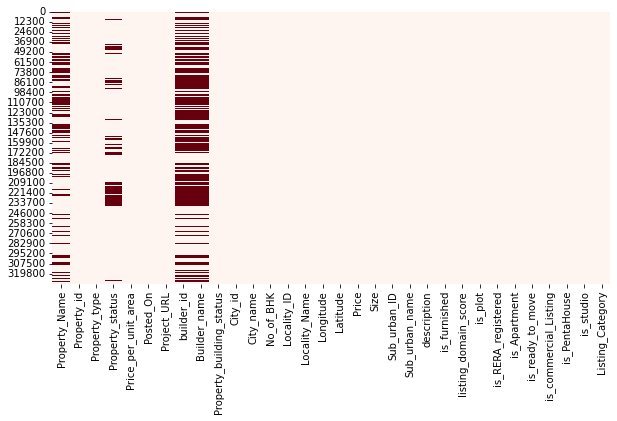

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='Reds',cbar = False)
plt.show()
#https://matplotlib.org/stable/tutorials/colors/colormaps.html

<a id="Null_treatment"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 2.2.2 Null Values Treatment </b>
    </font>
</div>

In [10]:
# Dropping of Features.

df.drop(columns=['Builder_name','builder_id','Property_Name'],inplace=True)

In [11]:
# Replacing of Null values.

df.Property_status.replace(method='ffill',inplace=True)

In [12]:
# Dropping of Null Values.

df.dropna(subset=['Locality_Name','description'],inplace=True)

<b> INFERENCE: </b><br><br>
1.	The columns – `builder_id` , `builder_name` , `Property_name` has a `large` amount of null values. So it is better to `drop` those columns. <br>
2.	Column - `Property_status` has the status of the Property which is arranged in a way. So we’ll fill the null values with the `forward` values. <br>
3.	The columns – `Locality_name` & `description` has very less amount of the Null Values so and there is no relation between the forward and backward values in them. So we consider `dropping the rows`.


<a id="Nulls"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 2.2.3 Visualizing after Null Value Treatment </b>
    </font>
</div>

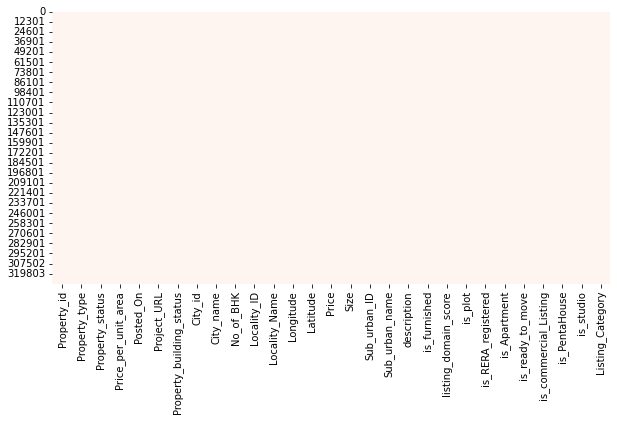

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='Reds',vmin=0,vmax=1,cbar = False)
plt.show()

<a id="NumV"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 2.3 Data Cleaning for Numeric Variables </b>
    </font>
</div>

In [13]:
df['Price_per_unit_area']=df['Price_per_unit_area'].str.replace(',','').astype('int')

In [14]:
#Checking for the no. of rows where Price_per_unit_area is 0
len(df[df.Price_per_unit_area == 0])

1

As we can see `there is only 1 row where Price_per_unit_area is 0`. <br>
Dropping this row will not result in much information loss. So, we Consider dropping this row.

In [15]:
df.drop(index=df[df.Price_per_unit_area == 0].index,inplace=True)

In [16]:
df['Size']=df.Size.str[0:-6]
df['Size']=df.Size.str.replace(',','').astype('int')

In [17]:
df['Price']=df['Price'].str.replace(',','').astype('int')

In [18]:
df.drop(columns='Project_URL',inplace=True)

* Highlights called `Price_per_unit_area`,`Size` and `Price` wrongly appointed `object` datatypes along these lines, right to `int` datatypes.

<a id="Duplicates"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 2.4 Check for Duplicate Values </b>
    </font>
</div>

In [19]:
df.duplicated().any()

False

* From above derivation, none of the elements contains `duplicates` values.

<a id="Sk"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 2.5 Check Skewness and Standard Deviation </b>
    </font>
</div>

In [20]:
dfnum = df[['Price_per_unit_area' , 'Price' , 'Size']]
dfcat = df.drop(columns=dfnum.columns)

In [21]:
Matrix = pd.DataFrame(dfnum.skew(), columns = ['Skewness'])
Matrix['Std.Deviation'] = dfnum.std()
Matrix.sort_values(by = 'Skewness', ascending = False, inplace = True)
Matrix

,Skewness,Std.Deviation
Size,335.914510,1.910359e+04
Price,11.404745,4.632398e+07
Price_per_unit_area,4.865035,1.090240e+04


In [23]:
columns_for_graphs = ['Property_type' , 'Property_status' , 'Price_per_unit_area', 'Price', 'Size' , 'Property_building_status' , 'City_name' , 'No_of_BHK' , 'is_furnished' , 'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move',
       'is_PentaHouse', 'is_studio',]

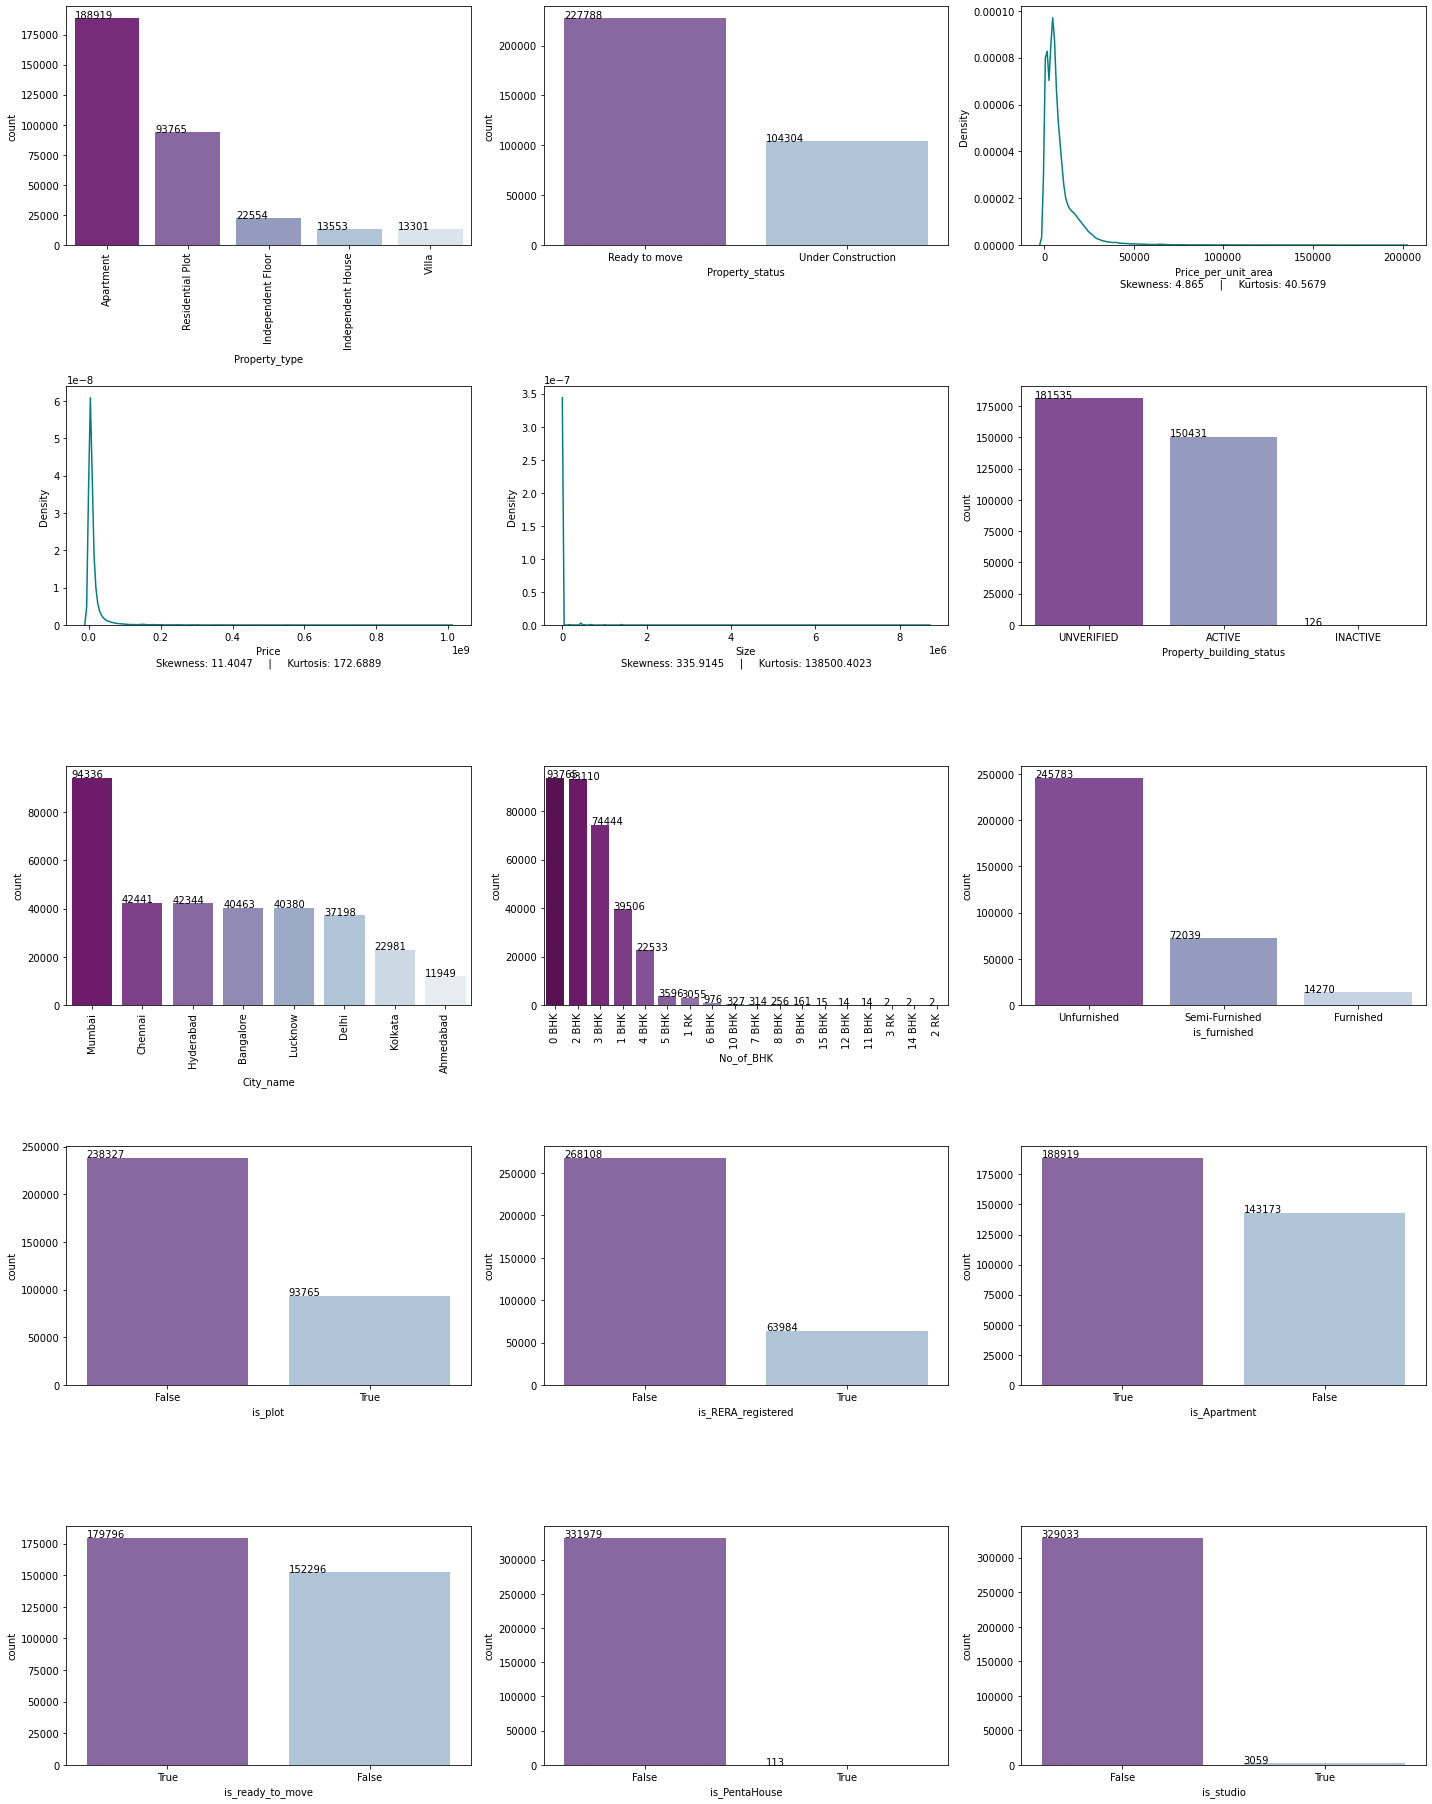

In [24]:
plt.figure(figsize=(20,30))
n=1
for i in columns_for_graphs:
    plt.subplot(6,3,n)
    if i in dfnum.columns:
        if df[i].skew() < 2 and df[i].skew() > -2 and df[i].kurt() < 7 and df[i].kurt() > -7:
            sns.kdeplot(df[i] ,color='red')
            plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}     |     Kurtosis: {round(df[i].kurt(),4)}",fontsize=10)
        else:
            sns.kdeplot(df[i],color='teal')
            plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}     |     Kurtosis: {round(df[i].kurt(),4)}",fontsize=10)
    else:
        ax = sns.countplot(df[i], order = df[i].value_counts().index , palette='BuPu_r')

        for p, label in zip(ax.patches, df[i].value_counts()):
            ax.annotate(label, (p.get_x(), p.get_height()+0.2))
        if len(df[i].value_counts()) >= 5:
            plt.xticks(rotation=90)
    plt.tight_layout()
    n+=1
plt.show()

* Skewness tells us the direction of outliers.

* Standard deviation measures the spread of the data, or dispersion of the data, or how clustered the data are around the mean, or how fairly the mean represents the data points.

**Inference:** Here by visualizing dist plot we can see that the **Features** plotted in `Teal color` are `positively skewed` and **Features** plotted in `red color` are `Negatively Skewed`.

**--:** *To reduce the impact of skewness we can use various transformation techiniques*

<a id="NumS"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 2.6 Scatter Plot for Numeric Variables </b>
    </font>
</div>

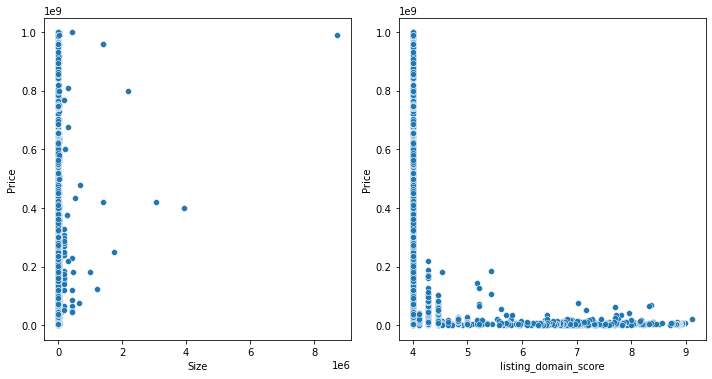

In [25]:
plt.figure(figsize=(10,10))
n = 1
for i in ['Size', 'listing_domain_score']:
    plt.subplot(2,2,n)
    sns.scatterplot(x = df[i] , y = df.Price , palette = 'BuPu_r')
    n += 1
plt.tight_layout()
plt.show()

In [26]:
# There are very few entries of size greater then 30,00,000 sq. ft. and these may act as Outliers. So we'll consider dropping those entries.
df.drop(index=df[df.Size > 3000000].index,inplace=True)

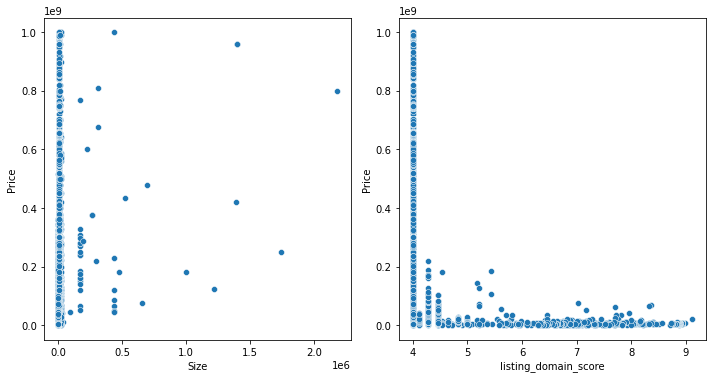

In [27]:
plt.figure(figsize=(10,10))
n = 1
for i in ['Size', 'listing_domain_score']:
    plt.subplot(2,2,n)
    sns.scatterplot(x = df[i] , y = df.Price , palette = 'BuPu_r')
    n += 1
plt.tight_layout()
plt.show()

<a id="Outliers"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 2.7 Checking for the Outliers (Boxplot) </b>
    </font>
</div>

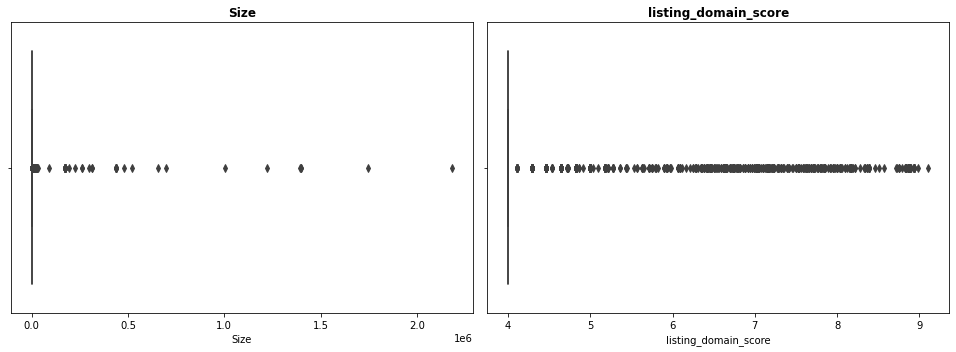

In [28]:
n=1
plt.figure(figsize=(20,5))
for i in ['Size', 'listing_domain_score']:
    plt.subplot(1,3,n)
    n+=1
    sns.boxplot(df[i])
    plt.title(i,weight='bold')
    plt.tight_layout()
plt.show()

In [29]:
from scipy.stats import trim_mean

In [30]:
print('Difference between mean and trim_mean with proportion cut = 0.1 of')
n = 1
for i in ['Size', 'listing_domain_score']:
    if len(i) > 10:
        print(n , i,"\t:",df[i].mean() - trim_mean(df[i],0.1))
    else:
        print(n , i," \t\t:",df[i].mean() - trim_mean(df[i],0.1))
    n += 1

Difference between mean and trim_mean with proportion cut = 0.1 of
1 Size  		: 293.02916099135155
2 listing_domain_score 	: 0.005560629740846146


📝**Inference:** By Visualizing above boxplot we can see that all the Features have potential outliers and i some features there are extreme values as well.

**Outliers:** Outliers is an observation which deviates so much from the other observations, that it become suspicious that it was generated by different mechanism or simply by error

**Extreme Values:** Extreme Values is an observation with value at the boundaries of the domain
    
**Reason for outliers exist in the data:**
1. Variability in the Data
2. An experimental measurment error

**Impact of outliers on Dataset:**
1. it causes various problem during statstical analysis
2. It effects the mean and standard deviation

**But in our dataset, the Outliers play an important Role. So, we can't drop them.**

<a id="Feature_Engineering"></a>
<div align='left'>
    <font color='#00008D' , size = 5px>
        <b> 3. Feature Engineering </b>
    </font>
</div>

In [22]:
# Convert into bins.
df['No_of_BHK'].replace(['5 BHK','6 BHK','10 BHK','7 BHK','8 BHK','9 BHK','15 BHK','12 BHK','11 BHK','14 BHK'],'>4 BHK',inplace=True)
df['No_of_BHK'].replace(['1 RK' , '2 RK' , '3 RK'] , 'RKs',inplace=True)

In [23]:
df['No_of_BHK'].value_counts()

0 BHK     93765
2 BHK     93110
3 BHK     74444
1 BHK     39506
4 BHK     22533
>4 BHK     5675
RKs        3059
Name: No_of_BHK, dtype: int64

In [24]:
# Convert into bins.
li = []
for i in df.Posted_On:
    if 'day' in i:
        li.append('Days')
    elif 'month' in i:
        li.append('Months')
    elif 'minute' in i:
        li.append('Minutes')
    elif 'hour' in i:
        li.append('Hours')
    elif 'year' in i:
        li.append('Years')
df['Posted_on'] = li

<a id="UniV"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 3.1 Univariate Analysis </b>
    </font>
</div>

<a id="Count"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 3.1.1 Count Plots for Categorical Variables </b>
    </font>
</div>

In [34]:
col=['City_name','No_of_BHK','is_furnished','Listing_Category','is_studio','Property_type','is_RERA_registered',
     'is_Apartment','is_ready_to_move','is_plot','Posted_on']
r = int(len(col)/3 +1)

In [35]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

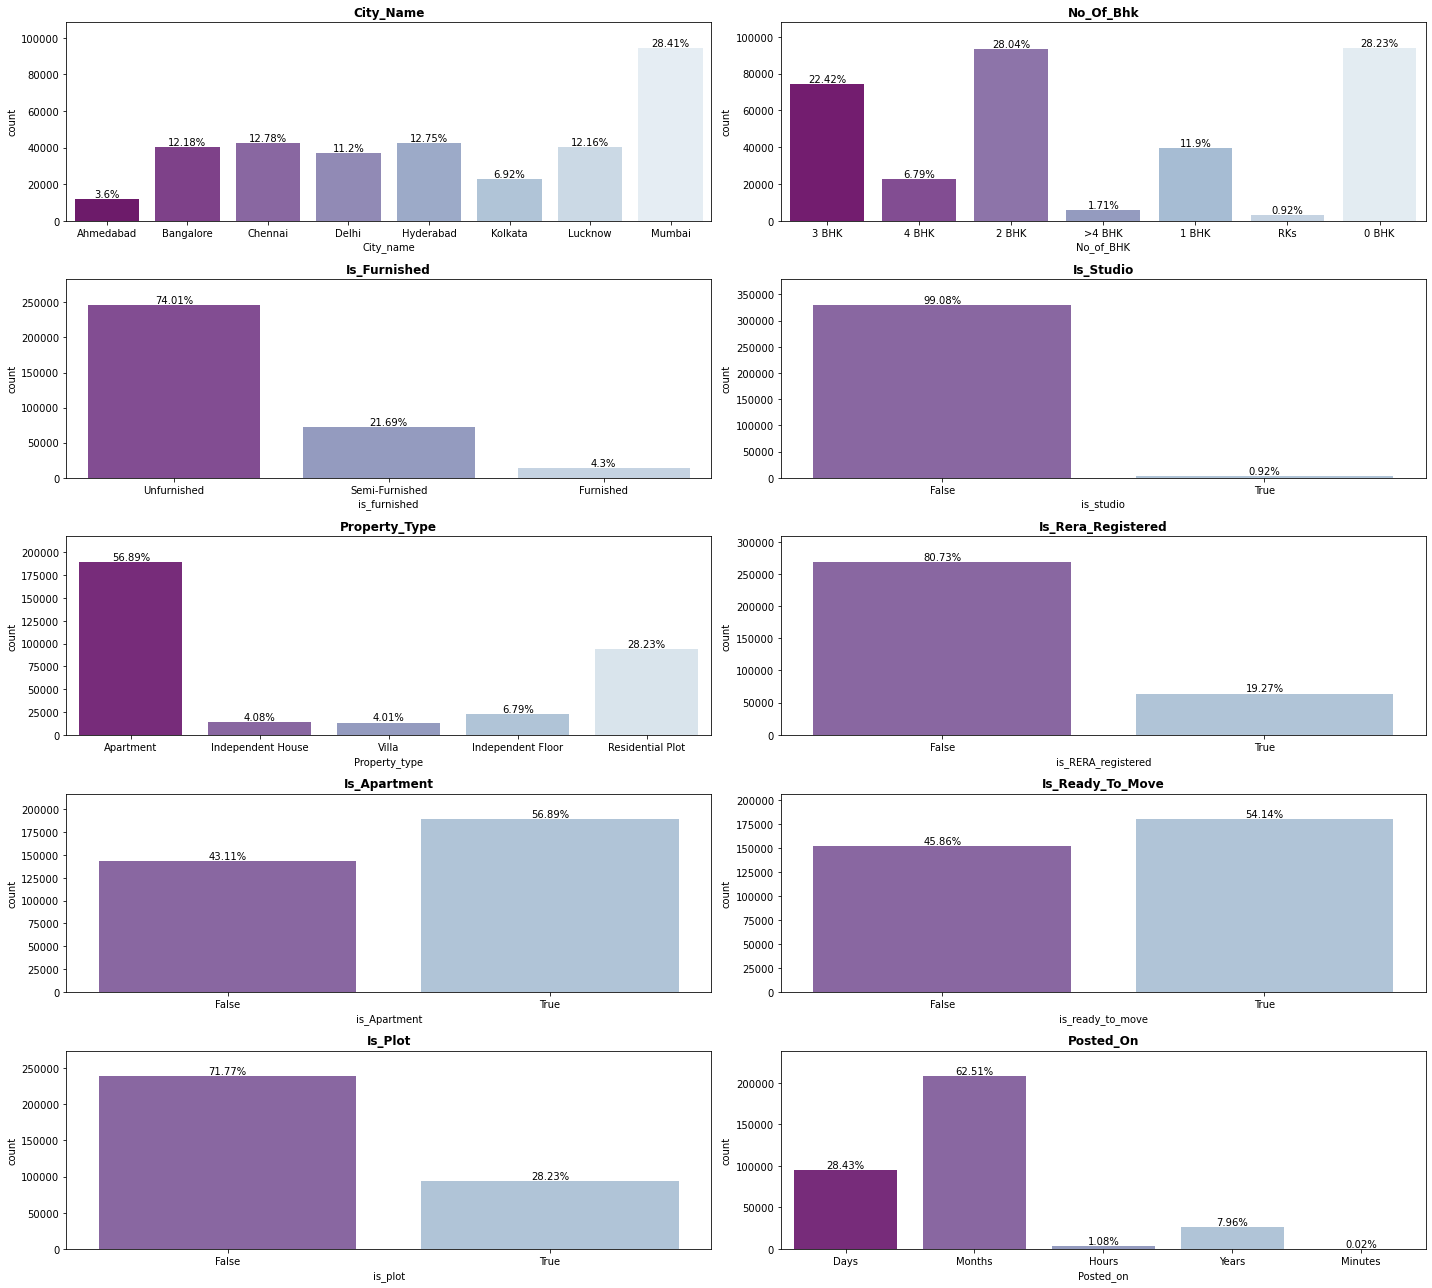

In [36]:
# Plotting the countplots for each categorical variable
col=['City_name','No_of_BHK','is_furnished','is_studio','Property_type','is_RERA_registered','is_Apartment','is_ready_to_move','is_plot','Posted_on']
plt.figure(figsize=(20,18))
for n,column in enumerate(col):
    plot = plt.subplot(5,2,n+1)
    sns.countplot(df[column],palette='BuPu_r').margins(y=0.15)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

<b> Observations: </b>
1. Around 28% of houses sell in Mumbai follows by Chennai and Hyderabad.<br>
2. Inclination for Houses like 2 BHK or 0 BHK are around 60%.<br>
3. Almost, 74% of houses sell are is unfurnished.<br>
4. All posting houses are sell.<br>
5. Practically 99%,a independent space houses sell everything in a solitary room with a different restroom.<br>
6. For the most part, People favor Apartment and Residential Plot.<br>
7. Around, 80% of houses sell, are not milestone regulations passed by the Government of India.<br>
8. Kinds of houses for the most part sell are loft, around 57%.<br>
9. 55% of individuals are prepared to move to new house.<br>
10. Individuals are liking to purchase plot rather than different choices.<br>

1. Selling of `Apartment` are exceptionally high in each city, follows by `Private plot`.<br>
2. Individuals liked to purchase `Plot` rather than some other 'property type'.<br>
3. The vast majority of `Apartment` are not outfitted.<br>
4. For the sell,most of `Listing Category` are apartment,followed by `Private plot`.<br>
5. Basically the greater part of `Apartment`,a free space houses sell everything in a singular room with an alternate bathroom.<br>
6. The vast majority of `Property_type` are not `RERA Registered`.<br>
7. 70% of people,'ready to move' in various `Property_type`.<br>

`Listing_Category` has no class imbalance as it has only 1 value in it i.e., `sell`. So we consider dropping the Column.

<a id="Kdes"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 3.1.2 Kde Plots for Numerical Variables </b>
    </font>
</div>

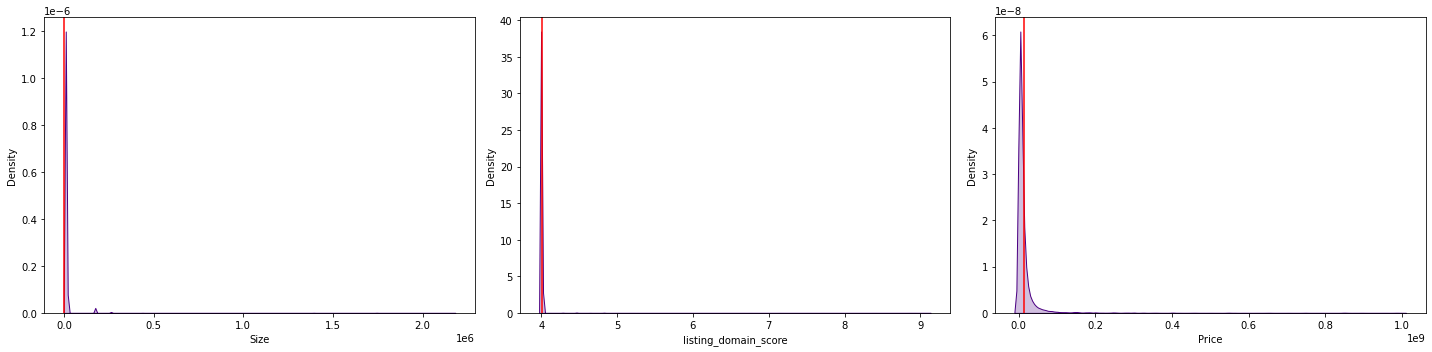

In [37]:
plt.figure(figsize=(20,5))
n = 1
for i in ['Size' , 'listing_domain_score' , 'Price']:
    plt.subplot(1,3,n)
    sns.kdeplot(df[i],fill=True, color = 'indigo')
    plt.axvline(df[i].mean(),color='red')
    n+=1
plt.tight_layout()
plt.show()

Here, the data skewness is more. <br>So, we'll scale the data before fitting into the model.

<a id="Bi"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 3.2 Bivariate or Multivariate Analysis </b>
    </font>
</div>

<a id="City_Price"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 3.2.1 Average Prices in the Cities </b>
    </font>
</div>

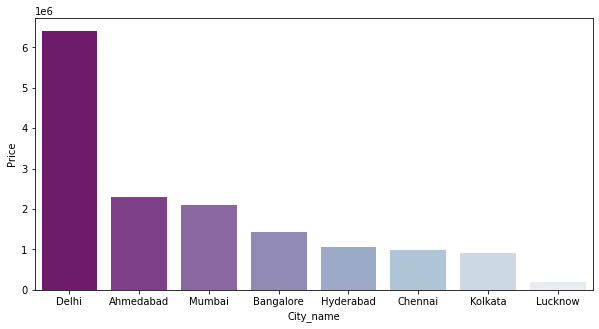

In [38]:
temp = df.groupby('City_name').mean()['Price'] / df.City_name.nunique() 
plt.figure(figsize=(10,5))
sns.barplot(x=temp.sort_values(ascending=False).index , y=temp.sort_values(ascending=False) , palette='BuPu_r')
plt.show()

* Mumbai city has more `Cost per unit area` trailed by different urban areas like Delhi, Bangalore and Chennai.

<a id="Corr"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 3.2.2 Correlation between the Variables </b>
    </font>
</div>

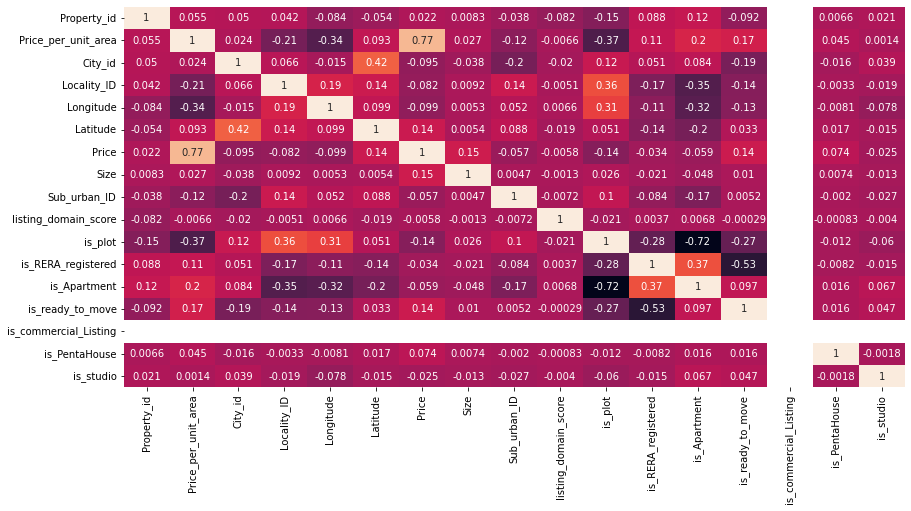

In [39]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,cbar=False)
plt.show()

* Assuming using `df.corr()`, the results from a heatmap are `Pearson correlation` coefficients which can be thought of as `the explainability between two arrays`.


* An effect score closer to 0 translates to there being `No` relationship. A score closer to 1 or -1 is a `Positive` or `Negative` relationship. A perfect score of 1 is a `Direct` correlation.

<a id="wrtCity"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 3.2.3 Categories' count with respect to City </b>
    </font>
</div>

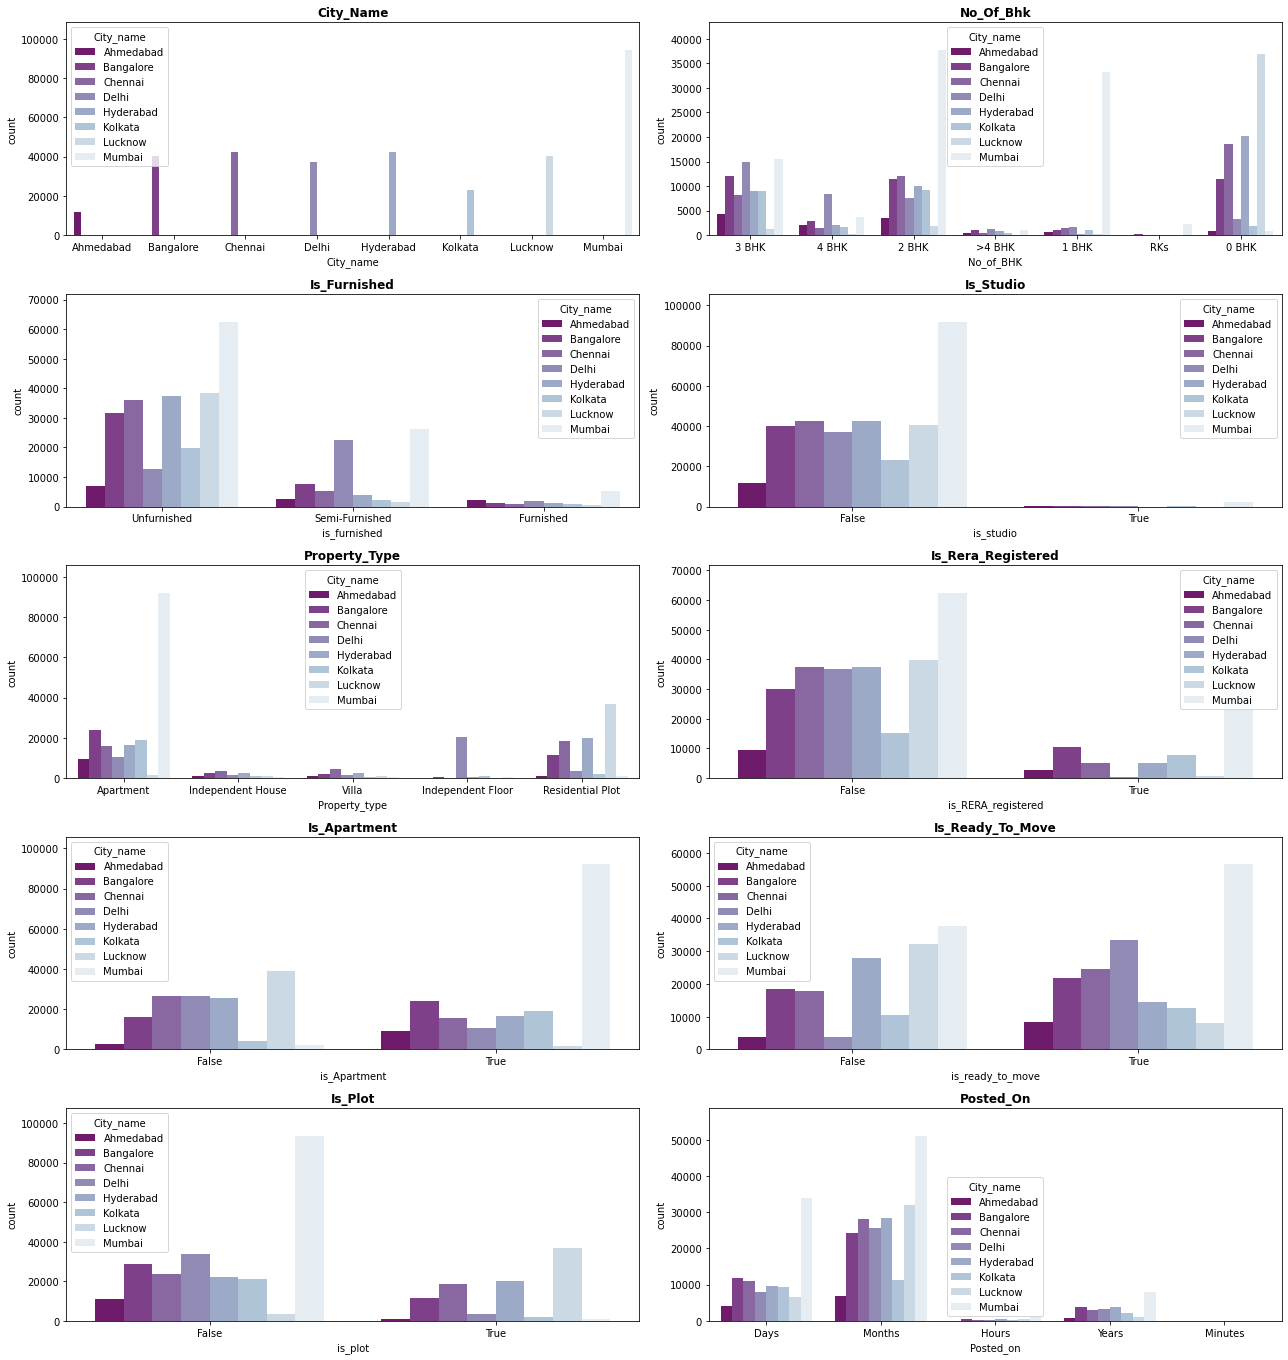

In [40]:
plt.figure(figsize=(18,19))
for n,column in enumerate(col):
    plot = plt.subplot(5,2,n+1)
    sns.countplot(df[column],hue=df['City_name'],palette='BuPu_r').margins(y=0.15)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

<a id="Top10"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 3.2.4 Top 10 Localities and Sub Urbans </b>
    </font>
</div>

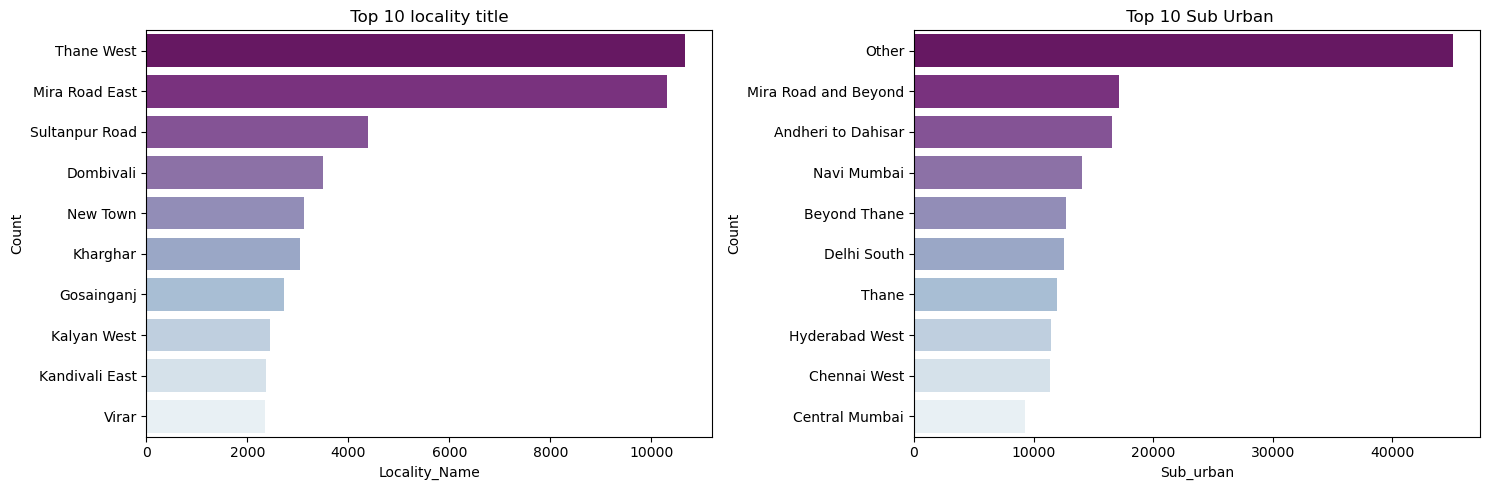

In [41]:
#plotting barplot
plt.figure(figsize=(15,5),dpi=100)
plt.subplot(1,2,1)
sns.barplot(y=df['Locality_Name'].value_counts().head(10).index ,x=df['Locality_Name'].value_counts().head(10).values , palette='BuPu_r')
plt.xlabel('Locality_Name')
plt.ylabel('Count')
plt.title(" Top 10 locality title ")#,weight='bold')
plt.subplot(1,2,2)
sns.barplot(y=df['Sub_urban_name'].value_counts().head(10).index ,x=df['Sub_urban_name'].value_counts().head(10).values,palette='BuPu_r')
plt.xlabel('Sub_urban')
plt.ylabel('Count')
plt.title(" Top 10 Sub Urban")#,weight='bold')
plt.tight_layout()

#### * Observations :

1. Generally Number of houses are from territory `Thane West` and `Mira Road`.


2. The vast majority of `Sub Urban` spots are others or `Mira street`.

<a id="PPbs"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> 3.2.5 Prices with respect to Property Building Status </b>
    </font>
</div>

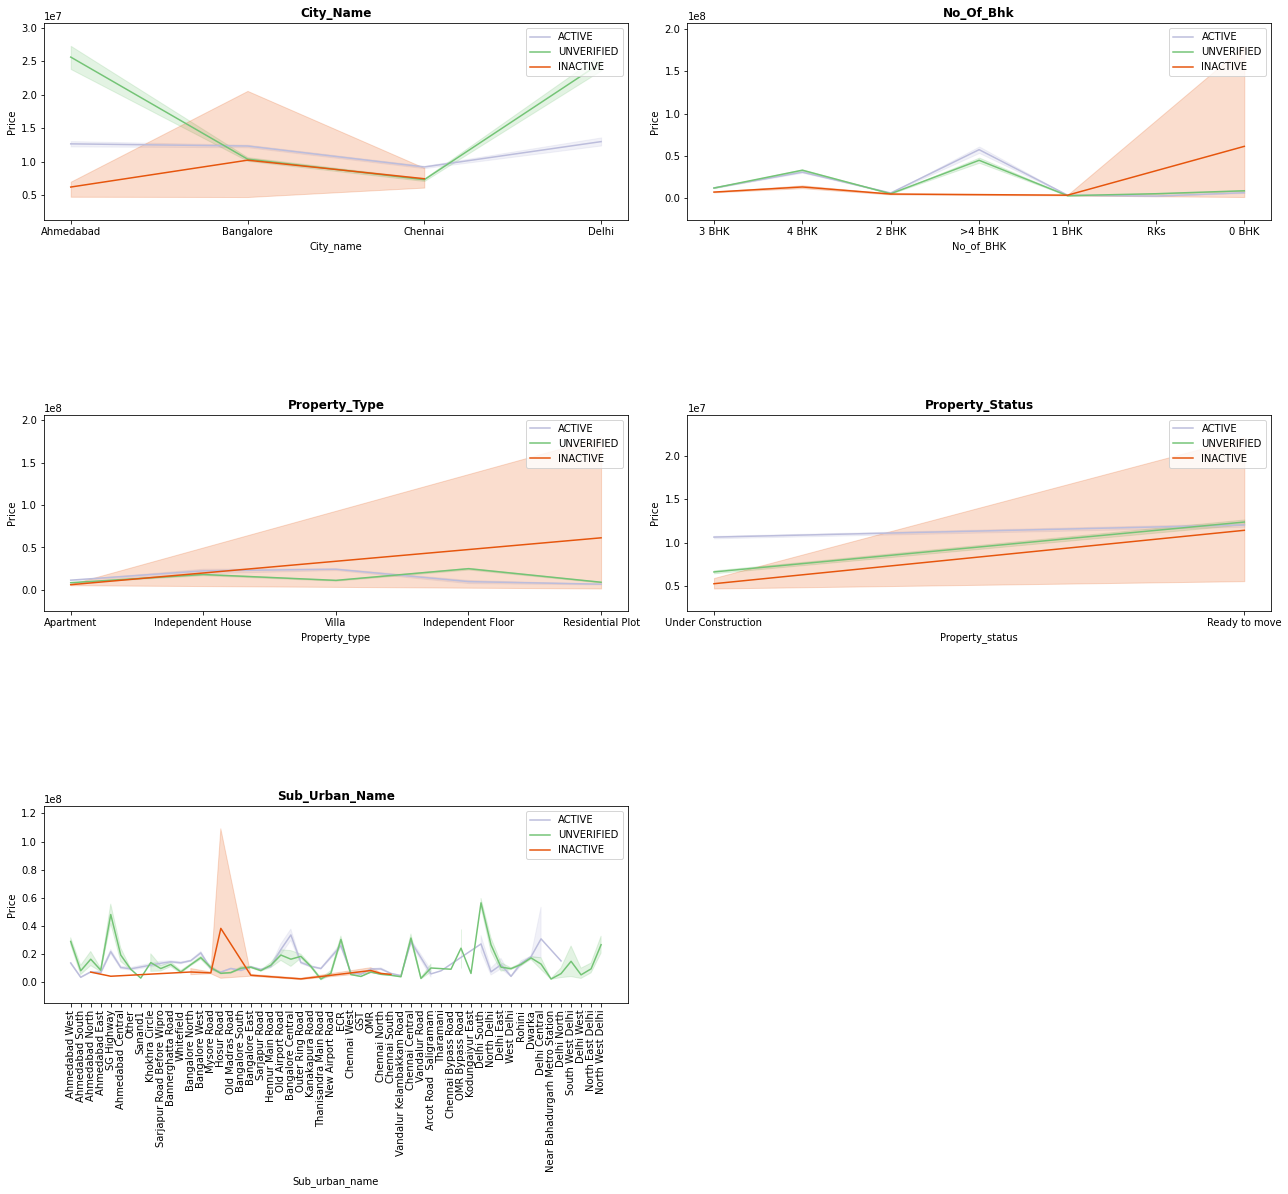

In [42]:
col=['City_name','No_of_BHK','Property_type','Property_status','Sub_urban_name']
plt.figure(figsize=(18,25))
for n,column in enumerate(col):
    plot = plt.subplot(5,2,n+1)
    sns.lineplot(x=df[column].head(100000),y=df['Price'].head(100000),hue=df['Property_building_status'].head(100000),palette='tab20c_r').margins(y=0.15)
    plt.title(f'{column.title()}',weight='bold')
    if column == 'Sub_urban_name':
        plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.tight_layout()
plt.show()

<a id="Stats"></a>
<div align='left'>
    <font color='#00008D' , size = 5px>
        <b> 4. Statistics Tests </b>
    </font>
</div>

In [25]:
from scipy import stats

In [26]:
#Dropping unnecessary columns from data.
df.drop(columns=['description'],inplace=True)

In [27]:
col1=['Property_status', 'Property_building_status','City_name', 'No_of_BHK', 
      'Locality_Name', 'Sub_urban_name','is_furnished','Listing_Category','Posted_on']

<a id="Chi2"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 4.1 Chi-square: Test for Independence </b>
    </font>
</div>

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

In [28]:
# Chic-contingency test.
for i in col1:
    observed=pd.crosstab(df[i],df['Property_type'])
    chi_stat,p_value,ddof,expected_val=stats.chi2_contingency(observed,correction=False)
    alpha=0.05
    if p_value<alpha:
        print('')
        print('* {} and Property_type both are not independent i.e Target relies upon that Feature.'.format(i))
        print('- Chic_stats:',chi_stat)
        print('> P-Value:',p_value)
        print('$ Degree of freedom:',ddof)
    else:
        print('')
        print('* {} and Property_type both are independent i.e Target not relies upon that Feature.'.format(i))
        print('- Chic_stats:',chi_stat)
        print('> P-Value:',p_value)
        print('$ Degree of freedom:',ddof)


* Property_status and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 28582.450525696404
> P-Value: 0.0
$ Degree of freedom: 4

* Property_building_status and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 104501.93840973516
> P-Value: 0.0
$ Degree of freedom: 8

* City_name and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 316862.3035382005
> P-Value: 0.0
$ Degree of freedom: 28

* No_of_BHK and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 395894.96543174126
> P-Value: 0.0
$ Degree of freedom: 24

* Locality_Name and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 592653.9660530642
> P-Value: 0.0
$ Degree of freedom: 20180

* Sub_urban_name and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 357832.28702466656
> P-Value: 0.0
$ Deg

📝**Inference:**
* Null Hypothesis (H0)- Both are Independent.
* Alternate Hypothesis (H1)- Both are not Independent.


* if p_value < `0.05`, `Reject` Null Hypothesis (H0)
* if p_value > `0.05`, `Fail to reject` Null Hypothesis (H1)


* Along these lines, From above measurable test,we get to know that `Property_type` isn't relies upon `Listing_category`,others all absolute highlights are reliant.

<a id="ttest"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 4.2 TTest for Independence of Variables  </b>
    </font>
</div>

In [29]:
# Numerical columns for t-independent Test.
t_col = df.select_dtypes(np.number).iloc[:,[0,1,2]].columns

In [30]:
for i in t_col:
    alpha=0.05
    stats1,p1_value=stats.jarque_bera(df[i])
    stats2,p2_value=stats.jarque_bera(df['Price'])
    if p1_value<0.05 and p2_value< 0.05:
        print('Jarque-bera test shows P-Value is less than 0.05 for {} and Price.:'.format(i))
        print('Mannwhitneyu Test:')
        t_stats,p_value=stats.mannwhitneyu(x=df[i],y=df['Price'])
        if p_value<alpha:
            print('* The difference between the {} and Price means are not statistically significant.Both are Independent'.format(i))
            print('- T_stats:',t_stats)
            print('> P-Value:',p_value)
            print('')
        else:
            print('* The difference between the {} and Price means are statistically significant.Both are Dependent'.format(i))
            print('- T_stats:',t_stats)
            print('> P-Value:',p_value)
            print('')
        
    else:
        print('Jarque-bera test shows P-Value is greater than 0.05 for {} and Price.'.format(i))
        print('T_Independent:')
        t_stats,p_value=stats.ttest_ind(a=df[i],b=df['Price'])
        if p_value<alpha:
            print('* The difference between the {} and Price are not statistically significant.Both are Independent'.format(i))
            print('- T_stats:',t_stats)
            print('> P-Value:',p_value)
        else:
            print('* The difference between the {} and Price means are statistically significant.Both are Dependent'.format(i))
            print('- T_stats:',t_stats)
            print('> P-Value:',p_value)

Jarque-bera test shows P-Value is less than 0.05 for Property_id and Price.:
Mannwhitneyu Test:
* The difference between the Property_id and Price means are not statistically significant.Both are Independent
- T_stats: 82750372751.0
> P-Value: 0.0

Jarque-bera test shows P-Value is less than 0.05 for Price_per_unit_area and Price.:
Mannwhitneyu Test:
* The difference between the Price_per_unit_area and Price means are not statistically significant.Both are Independent
- T_stats: 948702.0
> P-Value: 0.0

Jarque-bera test shows P-Value is less than 0.05 for City_id and Price.:
Mannwhitneyu Test:
* The difference between the City_id and Price means are not statistically significant.Both are Independent
- T_stats: 0.0
> P-Value: 0.0



###### The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.

The two sample t-test is used to compare the means of two independent populations. This test assumes that the populations are normally distributed from which the samples are taken.

The null and alternative hypothesis is given as:
<p style='text-indent:25em'> <strong> $H_{0}: \mu_{1} - \mu_{2} = \mu_{0}$ or $\mu_{1} - \mu_{2} \geq \mu_{0}$ or $\mu_{1} -\mu_{2} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{1} - \mu_{2} \neq \mu_{0} $ or $\mu_{1} - \mu_{2} < \mu_{0}$ or $\mu_{1} -\mu_{2} > \mu_{0}$</strong></p>

<a id="Krus"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 4.3 Kruskal Test for Significant Differences </b>
    </font>
</div>

In [49]:
# importing the kruskal function from the scipy.stats library 
from scipy.stats import kruskal

In [50]:
df_num=df.select_dtypes(np.number).iloc[:,[0,1,2]].columns

In [51]:
for i in dfnum:
    
    print(f'For {i}, the null and alternative hypothesis are:')
    print('\tH0: The variables {} and Property Status are independent'.format(i))
    print('\tH1: The variables {} and Property Status are not independent'.format(i))
    print('')
    
    Charged_Off_set=df[df['Property_status']=='Ready to move'][i]
    Fully_Paid_set=df[df['Property_status']=='Under Construction'][i]
    
    # use the 'kruskal()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value
    # pass the separated values of each numerical columns according to the target variable which
    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)

    print("Test statistic:", test_stat)
    print("p-value:", p)
   
    
    if p > 0.05:
        print('The above output shows that the H-test p-value is greater than 0.05, thus we fail to reject the null hypothesis\nand conclude that the variables {} and Property status are independent.'.format(i))
        print('\n\n')
    else:
        print('The above output shows that the H-test p-value is lesser than 0.05, thus we reject the null hypothesis\nand conclude that the variables {} and Property status are dependent.'.format(i))
        print('\n\n')

For Price_per_unit_area, the null and alternative hypothesis are:
	H0: The variables Price_per_unit_area and Property Status are independent
	H1: The variables Price_per_unit_area and Property Status are not independent

Test statistic: 4612.477987424067
p-value: 0.0
The above output shows that the H-test p-value is lesser than 0.05, thus we reject the null hypothesis
and conclude that the variables Price_per_unit_area and Property status are dependent.



For Price, the null and alternative hypothesis are:
	H0: The variables Price and Property Status are independent
	H1: The variables Price and Property Status are not independent

Test statistic: 2457.5270311094837
p-value: 0.0
The above output shows that the H-test p-value is lesser than 0.05, thus we reject the null hypothesis
and conclude that the variables Price and Property status are dependent.



For Size, the null and alternative hypothesis are:
	H0: The variables Size and Property Status are independent
	H1: The variables Siz

<a id="Posth"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 4.4 Post - hoc Analysis </b>
    </font>
</div>

If one-way ANOVA rejects the null hypothesis; we conclude that at least one treatment has a different mean. The test does not distinguish a treatment with the different average value. The post-hoc test or `multi comparison test` is used to identify such treatment(s).

In this section, we study the `Tukey's HSD` test. The test calculates the mean difference for each pair of treatments and returns the pair(s) with different average.

In [52]:
col=['Property_type','Property_status','is_RERA_registered', 'is_Apartment', 'is_ready_to_move', 'is_PentaHouse', 'is_studio','Posted_on']

In [53]:
import statsmodels.stats.multicomp as mc
for i in col:
    comp = mc.MultiComparison(groups = df[i], data = df['Price'])
    post_hoc = comp.tukeyhsd()
    print('')
    print(i)
    print(post_hoc.summary())


Property_type
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
      group1            group2         meandiff    p-adj      lower          upper      reject
----------------------------------------------------------------------------------------------
        Apartment Independent Floor  24541175.4627    0.0  23689152.8127  25393198.1127   True
        Apartment Independent House  25110208.7392    0.0  24034733.9551  26185683.5233   True
        Apartment  Residential Plot  -8097808.5818    0.0  -8580945.6318  -7614671.5317   True
        Apartment             Villa  49183905.0025    0.0  48098965.8766  50268844.1283   True
Independent Floor Independent House    569033.2765 0.7624   -745402.8286   1883469.3815  False
Independent Floor  Residential Plot -32638984.0445    0.0 -33535933.1356 -31742034.9533   True
Independent Floor             Villa  24642729.5398    0.0  23320538.4909  25964920.5886   True
Independent House  Residential Plot

###### * The `reject=True` for the pairs denotes that we reject the null hypothesis; the mean price is not the same.

<a id="Modelbuild"></a>
<div align='left'>
    <font color='#00008D' , size = 5px>
        <b> 5. Model </b>
    </font>
</div>

<a id="Dataprep"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 5.1 Data Preparation </b>
    </font>
</div>

In [31]:
df1 = df.copy()
df1.head(5)

,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,Posted_on
0,15446514,Apartment,Under Construction,4285,1 day ago,ACTIVE,1,Ahmedabad,3 BHK,51907,Bopal,72.465103,23.037386,7500000,1750,10229,Ahmedabad West,Unfurnished,4.0,False,True,True,False,False,False,False,sell,Days
1,15367414,Apartment,Under Construction,7000,2 days ago,ACTIVE,1,Ahmedabad,4 BHK,56407,Ambli,72.479668,23.027061,23688000,3384,10229,Ahmedabad West,Unfurnished,4.0,False,True,True,False,False,False,False,sell,Days
2,14683118,Apartment,Ready to move,5752,2 days ago,ACTIVE,1,Ahmedabad,3 BHK,66627,Naryanpura,72.558502,23.055193,13200840,2295,10229,Ahmedabad West,Unfurnished,4.0,False,False,True,True,False,False,False,sell,Days
3,5476295,Apartment,Ready to move,2486,5 days ago,ACTIVE,1,Ahmedabad,2 BHK,51899,Changodar,72.454720,22.940430,2283000,918,10228,Ahmedabad South,Unfurnished,4.0,False,False,True,True,False,False,False,sell,Days
4,15477040,Apartment,Under Construction,5324,8 days ago,ACTIVE,1,Ahmedabad,3 BHK,50368,Shilaj,72.477890,23.043703,9371000,1760,10229,Ahmedabad West,Unfurnished,4.0,False,True,True,False,False,False,False,sell,Days


By using the above Analysis, we'll drop some of the columns which are not helpfull in our prediction.

**Dropping Insignificant Variables**

In [ ]:
df1.drop(columns=['Listing_Category','description'],inplace=True)

In [33]:
df1.drop(columns=['Posted_On'],inplace=True)

In [34]:
# Dropping unnecessary Features from data

df1.drop(columns=['City_name','Locality_Name','Sub_urban_name'],inplace=True)

In [35]:
df1.select_dtypes(exclude='number').head(2)

,Property_type,Property_status,Property_building_status,No_of_BHK,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,Posted_on
0,Apartment,Under Construction,ACTIVE,3 BHK,Unfurnished,False,True,True,False,False,False,False,sell,Days
1,Apartment,Under Construction,ACTIVE,4 BHK,Unfurnished,False,True,True,False,False,False,False,sell,Days


**Numeric Variable Preparation**

In [36]:
df1.select_dtypes(include='number').head()

,Property_id,Price_per_unit_area,City_id,Locality_ID,Longitude,Latitude,Price,Size,Sub_urban_ID,listing_domain_score
0,15446514,4285,1,51907,72.465103,23.037386,7500000,1750,10229,4.0
1,15367414,7000,1,56407,72.479668,23.027061,23688000,3384,10229,4.0
2,14683118,5752,1,66627,72.558502,23.055193,13200840,2295,10229,4.0
3,5476295,2486,1,51899,72.454720,22.940430,2283000,918,10228,4.0
4,15477040,5324,1,50368,72.477890,23.043703,9371000,1760,10229,4.0


In [37]:
# Encoding
cat=df1.select_dtypes(exclude='number').columns

In [38]:
# Dummy encoding of Categorical Features.

df1=pd.get_dummies(columns=cat,data=df1,drop_first=True)

***

<a id="basem"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 5.2 Base Model Building </b>
    </font>
</div>

## `Regression` Analysis?

###### Dependent variable (y): It is the variable that we predict. It is also known as 'Target' or 'Response' variable. For regression, the dependent variable should be numeric.

#### Independent variable (X): It is the variable used in predicting the values of a target variable. There can be one or more independent variables in a dataset. It is also known as 'predictors' or 'features'. These variables can be numerical as well as categorical.

###### Ordinary Least Square Method (OLS)

The ordinary least square method aims to minimize the sum of the squared difference between the actual and the predicted values. Squaring ensures that each term is positive. It penalizes the model for the negative error terms. This approach calculates the β0 and β1 values that minimize the sum of squared differences along the line of prediction.

In [39]:
# Model Buliding

x_train, x_test, y_train, y_test=train_test_split(df1.drop(columns='Price'),df1['Price'],random_state=10,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(232464, 34)
(99628, 34)
(232464,)
(99628,)


In [40]:
# add the intercept 
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

### Model Evaluation

In [41]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
slr_model=sm.OLS(y_train.astype('float'),x_train.astype('float')).fit()
print(slr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 1.940e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:36:20   Log-Likelihood:            -4.2892e+06
No. Observations:              232464   AIC:                         8.578e+06
Df Residuals:                  232433   BIC:                         8.579e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

#### 📝**Interpretation:**

* The `R-squared` value obtained from this model is 0.73 which means that the above model explains 73% of the variation in the `Price`. 

* The `Durbin-Watson` test is used to check the autocorrelation between the residuals.
  The summary output shows that the Durbin-Watson test statistic is near to 2: which means there is no `autocorrelation`.
        
        
* The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.


* The `Cond. No` represents the `Condition Number (CN)` which is used to check the multicollinearity.

  If CN < 100: no multicollinearity<br>
  If CN is between 100 and 1000: moderate multicollinearity<br>
  If CN > 1000: severe multicollinearity

  Thus, it can be seen that there is `multicollinearity` in the data.

##### Predict the `Price` using X_test_full

In [42]:
# Predict

y_train_pred=slr_model.predict(x_train)
y_test_pred=slr_model.predict(x_test)

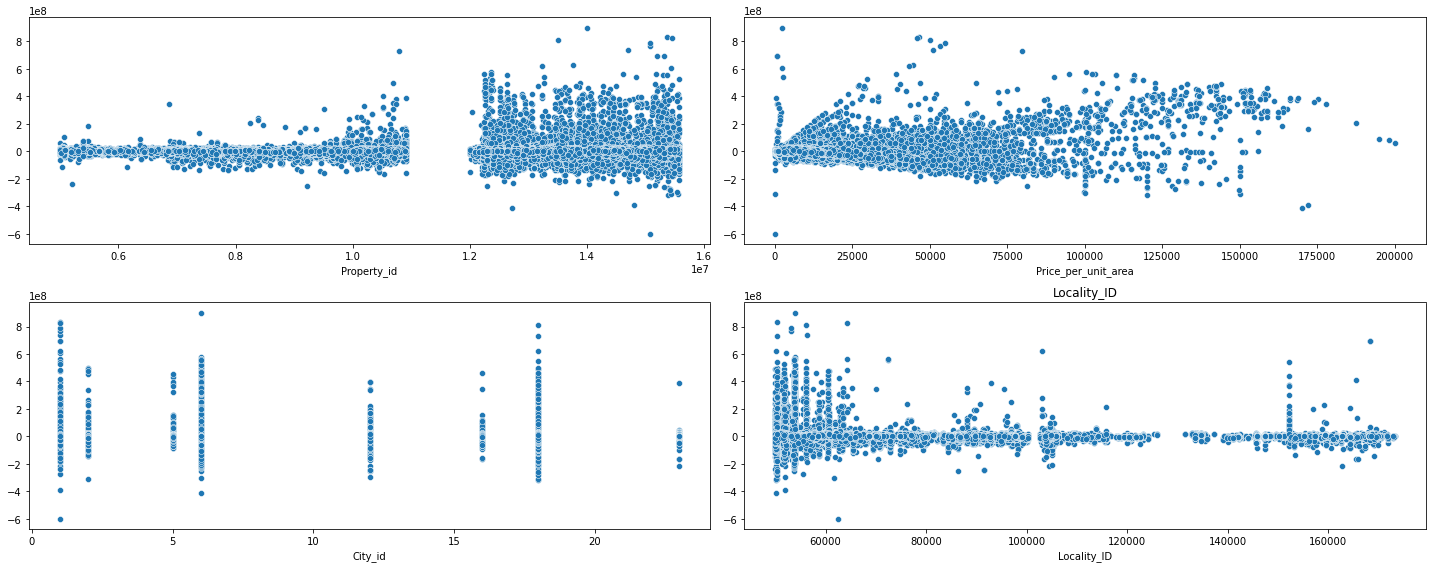

In [76]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20,8))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(x_train.columns[1:5], ax.flatten()):
    sns.scatterplot(x_train[variable],slr_model.resid , ax=subplot,palette='Spectral')
    plt.title(variable)
    plt.tight_layout()

# display the plot
plt.show()

📝**Interpretation:**

* The above plots show no specific pattern, implies that there is a linearity present in the data.

In [77]:
ndf=df1.select_dtypes(include=np.number)

## Feature Selection:

### Variance Inflation Factor (VIF)

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

Steps to calculate VIF:<br>
1. Regress one independent variable (say V<sub>i</sub>) on all the remaining independent variables (say V<sub>j</sub>, j ≠ i)
2. Calculate R-squared of the regression model
3. Calculate VIF for the variable V<sub>i</sub> using the formula:
<p style='text-indent:29em'> <strong> VIF = 1 / (1 - R-squared)</strong>  </p><br>
4. Repeate the steps 1 to 3 to calculate VIF of each independent variable

In [78]:
for ind in range(len(ndf.columns)):
    vif=pd.DataFrame()
    vif['Vif_f']=[ variance_inflation_factor(ndf.values,i) for i in range(len(ndf.columns))]
    vif['Features']=ndf.columns
    multi=vif[vif['Vif_f'] > 5]
    if (multi.empty==False):
        df_sorted=multi.sort_values(by='Vif_f',ascending=False)
    else:
        print(vif)
        break
    if (df_sorted.empty==False):
        ndf=ndf.drop(df_sorted.Features.iloc[0],axis=1)
    else:
        print(vif)

       Vif_f                             Features
0   3.411439                              City_id
1  -0.004046                                Price
2   1.018680                                 Size
3   1.236182      Property_type_Independent House
4   1.196556                  Property_type_Villa
5   4.320772   Property_status_Under Construction
6   1.001552    Property_building_status_INACTIVE
7   3.649342  Property_building_status_UNVERIFIED
8   1.468980                      No_of_BHK_1 BHK
9   1.717660                      No_of_BHK_3 BHK
10  1.427826                      No_of_BHK_4 BHK
11  1.263699                     No_of_BHK_>4 BHK
12  1.536283          is_furnished_Semi-Furnished
13  2.534766                         is_plot_True
14  3.579839              is_RERA_registered_True
15  3.305086                is_ready_to_move_True
16  1.008146                   is_PentaHouse_True
17  1.039061                       is_studio_True
18  1.036886                      Posted_on_Hours


In [85]:
# After VIF, Model Buliding with Significiant Features.

x_train, x_test, y_train, y_test=train_test_split(ndf.drop(columns=['Price']),df1['Price'],random_state=1,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(232464, 21)
(99628, 21)
(232464,)
(99628,)


In [86]:
# add the intercept 
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

### Model Evaluation

In [87]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
mlr_model=sm.OLS(y_train,x_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     3480.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:55:03   Log-Likelihood:            -4.4051e+06
No. Observations:              232464   AIC:                         8.810e+06
Df Residuals:                  232442   BIC:                         8.810e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

📝Interpretation:

* The `R-squared` value obtained from this model is 0.23 which means that the above model explains 23% of the variation in the `Price`. 


* The `Durbin-Watson` test is used to check the autocorrelation between the residuals.
  The summary output shows that the Durbin-Watson test statistic is near to 2: which means there is no `autocorrelation`.
        
        
* The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.


* The `Cond. No` represents the `Condition Number (CN)` which is used to check the multicollinearity.

  If CN < 100: no multicollinearity<br>
  If CN is between 100 and 1000: moderate multicollinearity<br>
  If CN > 1000: severe multicollinearity

  Thus, it can be seen that there is `multicollinearity` in the data, but slightly decrease after `VIF`.

---

##### Predict the `Price` using X_test_full

In [88]:
# Predict

y_train_pred=mlr_model.predict(x_train)
y_test_pred=mlr_model.predict(x_test)

### Q-Q Plot

* Q-Q plot is s visualization technique to check the normality of the residuals. It plots the quantiles of observed data versus the quantiles of the standard normal distribution.

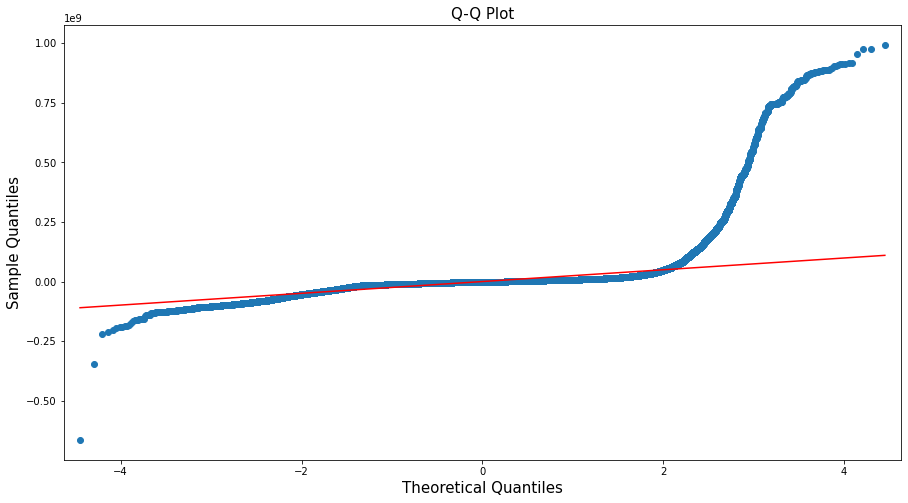

In [89]:
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(mlr_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show() 

📝**Interpretation:**

The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are close to the diagonal line, we conclude that the residuals do not follow a `normal distribution`.

### Create a generalized function to create a dataframe containing the scores from all the models

In [90]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(x_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = x_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = x_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

In [91]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE':np.mean(np.abs((y_test-y_test_pred)/y_test)*100), 
                       'Test_RMSE': rmse(y_test, y_test_pred), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

### Model Performance

In [92]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))

Mean Squared Error (MSE) on training set:  1685806530910589.0
Mean Squared Error (MSE) on testing set:  1503679532542646.8
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  41058574.38965202
Root mean Squared Error (RMSE) on testing set:  38777306.927411124


#### Build a MLR model on a training dataset.

In [93]:
Linereg=LinearRegression()
Linereg.fit(x_train,y_train)

LinearRegression()

In [94]:
# Predict

y_train_pred=Linereg.predict(x_train)
y_test_pred=Linereg.predict(x_test)

In [95]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = Linereg)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.239207,0.239135,3.877731e+07,235.307143


In [96]:
matrix = pd.Series({'Model_Name': "MLR Full Model",
                     'Alpha (Wherever Required)':'-',
                     'l1-ratio':'-',
                     'R-Squared': mlr_model.rsquared,
                     'Adj. R-Squared': mlr_model.rsquared_adj,
                     'Test_RMSE': rmse(y_test, y_test_pred),
                     'Test_MAPE':np.mean(np.abs((y_test-y_test_pred)/y_test)*100)
                   })
score_card = score_card.append(matrix, ignore_index = True)

# print the result table
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.239207,0.239135,3.877731e+07,235.307143
1,MLR Full Model,-,-,0.239207,0.239138,3.877731e+07,235.307143


### Model Performance

In [97]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))

Mean Squared Error (MSE) on training set:  1685806530910589.8
Mean Squared Error (MSE) on testing set:  1503679532542609.5
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  41058574.38965203
Root mean Squared Error (RMSE) on testing set:  38777306.92741065


📝**Interpretation:**

`RMSE` on the training set is `16.000`, while on the test set it is `15.000`. We can see that there is large difference in the `RMSE` of the train and the test set. This implies that our model has `Under-fitted` on the train set.

#### Recursive Feature Elimination (RFE)

* It is the process that returns the significant features in the dataset by recursively removing the less significant feature subsets.

In [98]:
# RFE
rfe_model=RFE(estimator=LinearRegression())
rfe_model.fit(x_train,y_train)
print('R-squared value:',rfe_model.score(x_train,y_train))

R-squared value: 0.22898691650927405


* The `R-squared` value obtained from this model is 0.22 which means that the above model explains 22% of the variation in the `Price` and it slightly `decreases` after considering `Ranking` features. 

In [99]:
# Dataframe for Recursive
dataframe=pd.DataFrame(data=rfe_model.ranking_,index=x_train.columns,columns=['Ranking'])
dataframe[dataframe['Ranking']==1]

,Ranking
Property_type_Villa,1
Property_building_status_UNVERIFIED,1
No_of_BHK_3 BHK,1
No_of_BHK_4 BHK,1
No_of_BHK_>4 BHK,1
is_furnished_Semi-Furnished,1
is_RERA_registered_True,1
is_ready_to_move_True,1
is_PentaHouse_True,1
is_studio_True,1


## Cross Validation

### K-Fold Cross Validation using `cross_val_score()`:
`K-Fold` cross validation is where a given dataset is divided into `K folds` where at some stage each fold is used as a test set.

`cross_val_score()` also does the stratified sampling internally if required.

In [100]:
# K-Fold
linreg = LinearRegression()
k_fold_score=cross_val_score(estimator=linreg,X=x_train,y=y_train,scoring='r2')
print("Average score obtained: ", round(np.mean(k_fold_score), 4))

Average score obtained:  0.2339



## Gradient Descent


### Stochastic Gradient Descent

The gradient descent method considers all the data points to calculate the values of the parameters at each step. For a very large dataset, this method becomes computationally expensive. To avoid this problem, we use Stochastic Gradient Descent (SGD) which considers a single data point (sample) to perform each iteration. Each sample is randomly selected for performing the iteration.

####  Build MLR model using SGD method.

In [101]:
sgd_model=SGDRegressor()
sgd_model.fit(x_train,y_train)

SGDRegressor()

In [102]:
# Predict
y_pred_tr=sgd_model.predict(x_train)
y_pred_te=sgd_model.predict(x_test)

### Model Performance

In [103]:
mse_train=mean_squared_error(y_train,y_pred_tr)
mse_test=mean_squared_error(y_test,y_pred_te)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))

Mean Squared Error (MSE) on training set:  4.0564772742439356e+32
Mean Squared Error (MSE) on testing set:  2.3738368133216546e+31
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  2.0140698285421824e+16
Root mean Squared Error (RMSE) on testing set:  4872203621896005.0


📝**Interpretation:**

`RMSE` on the training set is `4.056`, while on the test set it is `2.37`. We can see that there is large difference in the `RMSE` of the train and the test set. This implies that our model has `Under-fitted` on the train set.

#### Visualize the change in values of coefficients obtained from `slr_model ` and `sgd_model`.

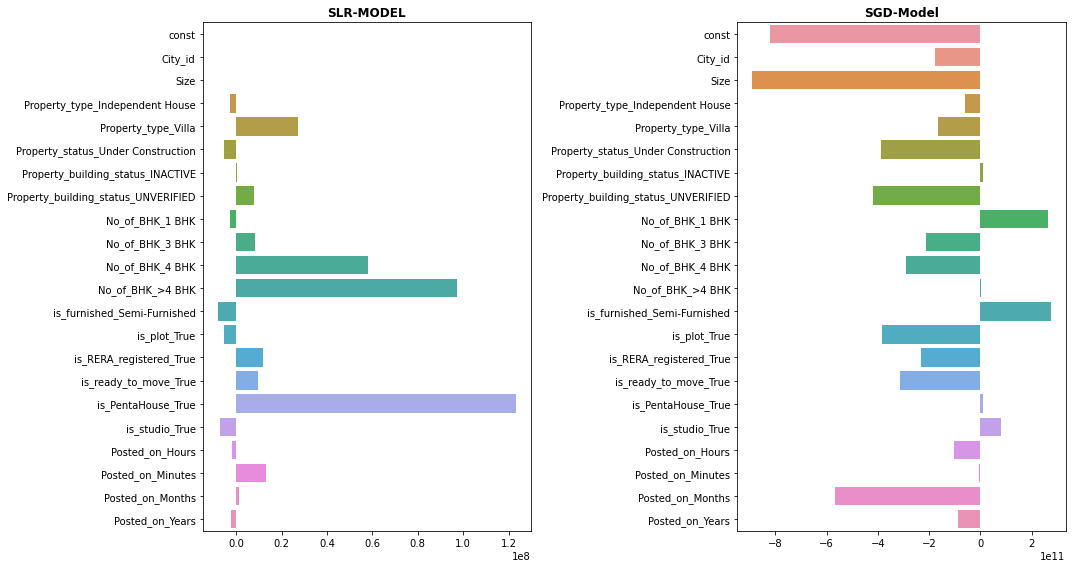

In [104]:
plt.subplot(1,2,1)
sns.barplot(x=Linereg.coef_,y=x_train.columns)
plt.title('SLR-MODEL',weight='bold')
plt.subplot(1,2,2)
sns.barplot(x=sgd_model.coef_,y=x_train.columns)
plt.title('SGD-Model',weight='bold')
plt.tight_layout()

📝Interpretation:

* The coefficients obtained from SGD have smaller values as compared to the coefficients obtained from linear regression using OLS.

## Regularization

One way to deal with the overfitting problem is by adding the `Regularization` to the model. It is observed that inflation of the coefficients cause overfitting. To prevent overfitting, it is important to regulate the coefficients by penalizing possible coefficient inflations. Regularization imposes penalties on parameters if they inflate to large values to prevent them from being weighted too heavily. In this section, we will learn about the three regularization techniques:

1. Ridge Regression
2. Lasso Regression
3. Elastic Net Regression

### Ridge Regression

Most of the times our data can show multicollinearity in the variables. To analyze such data we can use `Ridge Regression`. It uses the L2 norm for regularization. 

#### Build regression model using Ridge Regression.

In [105]:
for i in range(1,26,2):
    ridge=Ridge(alpha=i,max_iter=2000)
    r_model=ridge.fit(x_train,y_train)
    y_pred=r_model.predict(x_test)
    print('RMSE for alpha {}'.format(i),rmse(y_test,y_pred))

RMSE for alpha 1 38777409.66002928
RMSE for alpha 3 38777675.44916685
RMSE for alpha 5 38778010.89415001
RMSE for alpha 7 38778404.77317753
RMSE for alpha 9 38778847.53094291
RMSE for alpha 11 38779331.01256122
RMSE for alpha 13 38779848.24445964
RMSE for alpha 15 38780393.25303172
RMSE for alpha 17 38780960.91385263
RMSE for alpha 19 38781546.82577059
RMSE for alpha 21 38782147.205355376
RMSE for alpha 23 38782758.798087634
RMSE for alpha 25 38783378.80337759


**Interpretation:**
    
After applying the ridge regression with multiple alpha , the best RMSE value given by `alpha=1` decreased to `0.39`.

In [106]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Model-2', model = r_model,alpha=7)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.239207,0.239135,3.877731e+07,235.307143
1,MLR Full Model,-,-,0.239207,0.239138,3.877731e+07,235.307143
2,Ridge Model-2,7,-,0.239065,0.238993,3.877731e+07,235.307143


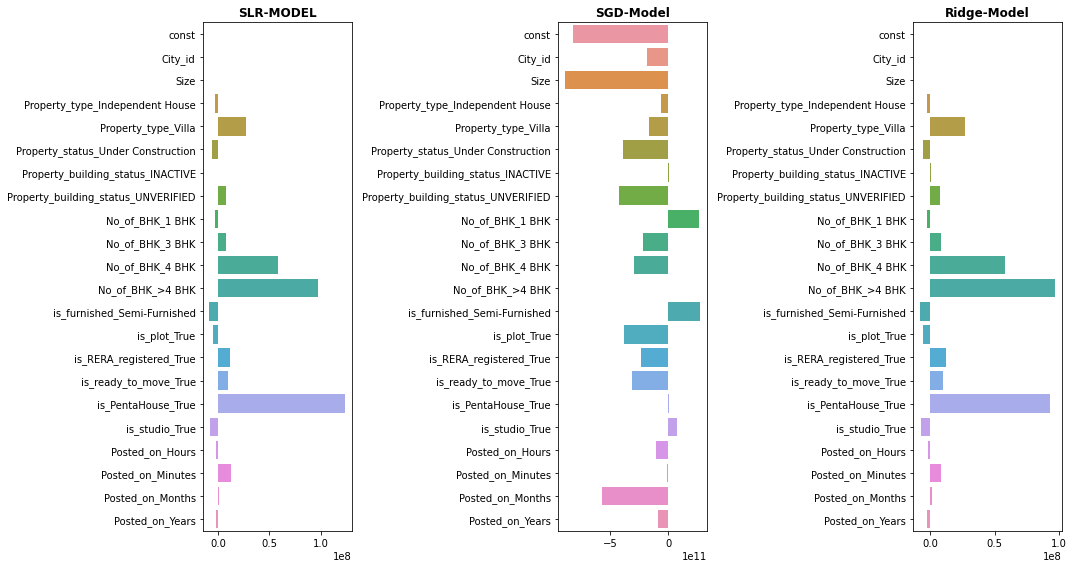

In [107]:
plt.subplot(1,3,1)
sns.barplot(x=Linereg.coef_,y=x_train.columns)
plt.title('SLR-MODEL',weight='bold')
plt.subplot(1,3,2)
sns.barplot(x=sgd_model.coef_,y=x_train.columns)
plt.title('SGD-Model',weight='bold')
plt.subplot(1,3,3)
sns.barplot(x=r_model.coef_,y=x_train.columns)
plt.title('Ridge-Model',weight='bold')
plt.tight_layout()

### Lasso Regression

Lasso regression shrinks the less important variable's coefficient to zero which makes this technique more useful when we are dealing with large number of variables. It is a type of regularization technique that uses L1 norm for regularization. 

In [108]:
for i in range(1,16,2):
    lasso=Lasso(alpha=i)
    l_model=lasso.fit(x_train,y_train)
    y_pred_t=l_model.predict(x_test)
    y_pred_tr=l_model.predict(x_train)
    print('--'*10)
    print('RMSE for alpha {} for training set'.format(i),rmse(y_train,y_pred_tr))
    print('RMSE for alpha {} for testing set'.format(i),rmse(y_test,y_pred_t))

--------------------
RMSE for alpha 1 for training set 41058574.389791735
RMSE for alpha 1 for testing set 38777306.59462693
--------------------
RMSE for alpha 3 for training set 41058574.390909284
RMSE for alpha 3 for testing set 38777305.93001255
--------------------
RMSE for alpha 5 for training set 41058574.39314438
RMSE for alpha 5 for testing set 38777305.26668053
--------------------
RMSE for alpha 7 for training set 41058574.396497026
RMSE for alpha 7 for testing set 38777304.60459829
--------------------
RMSE for alpha 9 for training set 41058574.40096722
RMSE for alpha 9 for testing set 38777303.943813495
--------------------
RMSE for alpha 11 for training set 41058574.406554945
RMSE for alpha 11 for testing set 38777303.28433304
--------------------
RMSE for alpha 13 for training set 41058574.413260214
RMSE for alpha 13 for testing set 38777302.62616599
--------------------
RMSE for alpha 15 for training set 41058574.421083085
RMSE for alpha 15 for testing set 38777301.9691

**Interpretation:**
    
After applying the `Lasso` regression with multiple alpha , the best RMSE value given by `alpha=3`.

In [109]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Model', model = l_model,alpha=3)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.239207,0.239135,3.877731e+07,235.307143
1,MLR Full Model,-,-,0.239207,0.239138,3.877731e+07,235.307143
2,Ridge Model-2,7,-,0.239065,0.238993,3.877731e+07,235.307143
3,Lasso Model,3,-,0.239207,0.239135,3.877731e+07,235.307143


In [110]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Model-2', model = l_model,alpha=7)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.239207,0.239135,3.877731e+07,235.307143
1,MLR Full Model,-,-,0.239207,0.239138,3.877731e+07,235.307143
2,Ridge Model-2,7,-,0.239065,0.238993,3.877731e+07,235.307143
3,Lasso Model,3,-,0.239207,0.239135,3.877731e+07,235.307143
4,Lasso Model-2,7,-,0.239207,0.239135,3.877731e+07,235.307143


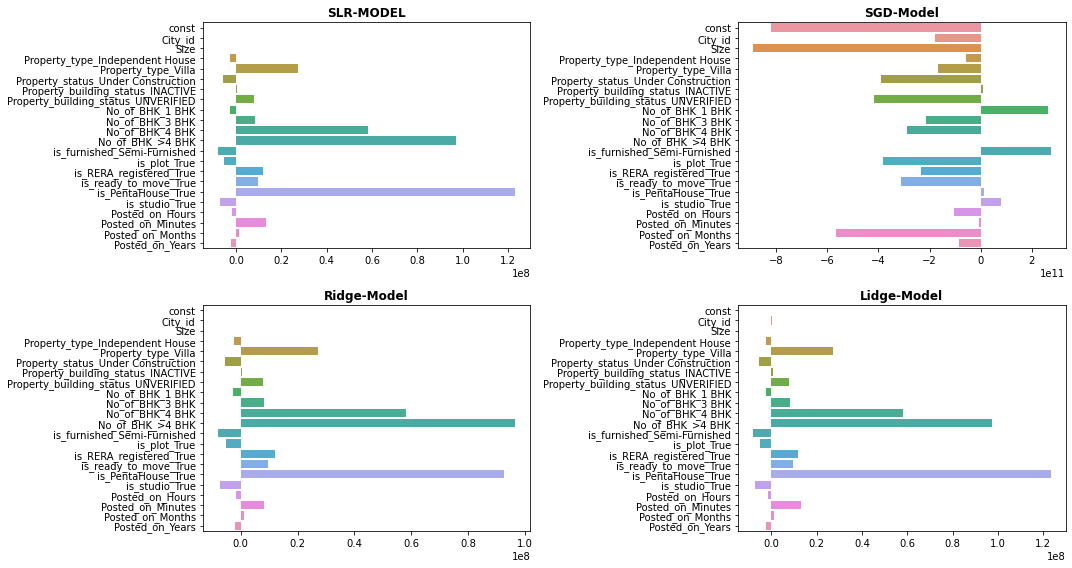

In [111]:
# Visualize
plt.subplot(2,2,1)
sns.barplot(x=Linereg.coef_,y=x_train.columns)
plt.title('SLR-MODEL',weight='bold')
plt.subplot(2,2,2)
sns.barplot(x=sgd_model.coef_,y=x_train.columns)
plt.title('SGD-Model',weight='bold')
plt.subplot(2,2,3)
sns.barplot(x=r_model.coef_,y=x_train.columns)
plt.title('Ridge-Model',weight='bold')
plt.subplot(2,2,4)
sns.barplot(x=l_model.coef_,y=x_train.columns)
plt.title('Lidge-Model',weight='bold')
plt.tight_layout()

## GridSearchCV

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. Following are some of the parameters that GridSearchCV takes:

1. estimator: pass the machine learning algorithm model
2. param_grid: takes a dictionary having parameter names as keys and list of parameters as values
3. cv: number of folds for k-fold cross validation

### Find optimal value of alpha for `Elastic Net Regression`

In [112]:
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01],
                      'l1_ratio':[0.0001, 0.0002, 0.001]}]

#### Elastic Net Regression

This technique is a combination of Rigde and Lasso reression techniques. It considers the linear combination of penalties for L1 and L2 regularization.

In [113]:
# initiate the elastic net regression model  
enet1 = ElasticNet()
enet1.fit(x_train,y_train)

ElasticNet()

In [114]:
# initiate the elastic net regression model  
enet = ElasticNet()

In [115]:
grid_model=GridSearchCV(estimator=enet,param_grid=tuned_paramaters,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01],
                          'l1_ratio': [0.0001, 0.0002, 0.001]}])

In [116]:
# get the best parameters
print('Best parameters for Elastic Net Regression: ', grid_model.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.001} 



In [117]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GridSearchCV (ElasticNet)', model = grid_model,alpha=0.0001,l1_ratio=0.0001)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.239207,0.239135,3.877731e+07,235.307143
1,MLR Full Model,-,-,0.239207,0.239138,3.877731e+07,235.307143
2,Ridge Model-2,7,-,0.239065,0.238993,3.877731e+07,235.307143
3,Lasso Model,3,-,0.239207,0.239135,3.877731e+07,235.307143
4,Lasso Model-2,7,-,0.239207,0.239135,3.877731e+07,235.307143
5,GridSearchCV (ElasticNet),0.0001,0.0001,0.239080,0.239008,3.877731e+07,235.307143


In [118]:
# Predict

y_pred_tr=grid_model.predict(x_train)
y_pred_te=grid_model.predict(x_test)

### Model Performance

In [119]:
mse_train=mean_squared_error(y_train,y_pred_tr)
mse_test=mean_squared_error(y_test,y_pred_te)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))

Mean Squared Error (MSE) on training set:  1686087584296902.8
Mean Squared Error (MSE) on testing set:  1504107717176476.5
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  41061996.837671
Root mean Squared Error (RMSE) on testing set:  38782827.606770456


In [120]:
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[ 1, 5, 10 ],'max_iter':[400, 500, 600]}]

In [121]:
# initiate the ridge regression model 
ridge_model=Ridge()
grid_model=GridSearchCV(estimator=ridge_model,param_grid=tuned_paramaters,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1, 5, 10], 'max_iter': [400, 500, 600]}])

In [122]:
# get the best parameters
print('Best parameters for Ridge Regression: ', grid_model.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 5, 'max_iter': 400} 



In [123]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GridSearchCV (Ridge)', model = grid_model,alpha=5)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.239207,0.239135,3.877731e+07,235.307143
1,MLR Full Model,-,-,0.239207,0.239138,3.877731e+07,235.307143
2,Ridge Model-2,7,-,0.239065,0.238993,3.877731e+07,235.307143
3,Lasso Model,3,-,0.239207,0.239135,3.877731e+07,235.307143
4,Lasso Model-2,7,-,0.239207,0.239135,3.877731e+07,235.307143
5,GridSearchCV (ElasticNet),0.0001,0.0001,0.239080,0.239008,3.877731e+07,235.307143
6,GridSearchCV (Ridge),5,-,0.239198,0.239126,3.877731e+07,235.307143


In [124]:
# initiate the lasso regression model 
lasso_model=Ridge()
grid_model=GridSearchCV(estimator=lasso_model,param_grid=tuned_paramaters,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1, 5, 10], 'max_iter': [400, 500, 600]}])

In [125]:
# get the best parameters
print('Best parameters for Lasso Regression: ', grid_model.best_params_, '\n')

Best parameters for Lasso Regression:  {'alpha': 5, 'max_iter': 400} 



In [126]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GridSearchCV (Lasso)', model = grid_model,alpha=5)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.239207,0.239135,3.877731e+07,235.307143
1,MLR Full Model,-,-,0.239207,0.239138,3.877731e+07,235.307143
2,Ridge Model-2,7,-,0.239065,0.238993,3.877731e+07,235.307143
3,Lasso Model,3,-,0.239207,0.239135,3.877731e+07,235.307143
4,Lasso Model-2,7,-,0.239207,0.239135,3.877731e+07,235.307143
5,GridSearchCV (ElasticNet),0.0001,0.0001,0.239080,0.239008,3.877731e+07,235.307143
6,GridSearchCV (Ridge),5,-,0.239198,0.239126,3.877731e+07,235.307143
7,GridSearchCV (Lasso),5,-,0.239198,0.239126,3.877731e+07,235.307143


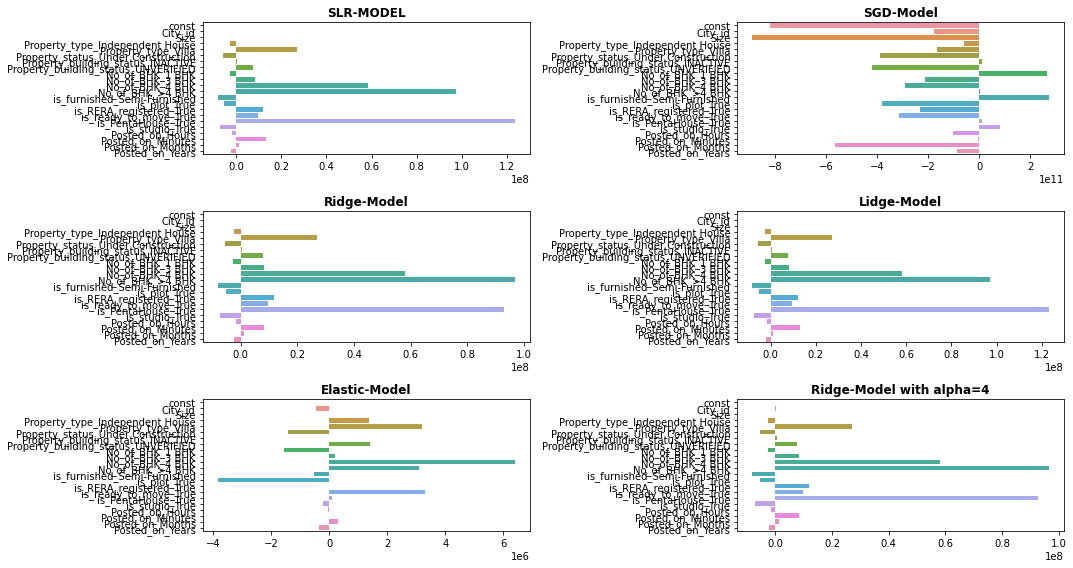

In [127]:
# Visualize
plt.subplot(3,2,1)
sns.barplot(x=Linereg.coef_,y=x_train.columns)
plt.title('SLR-MODEL',weight='bold')
plt.subplot(3,2,2)
sns.barplot(x=sgd_model.coef_,y=x_train.columns)
plt.title('SGD-Model',weight='bold')
plt.subplot(3,2,3)
sns.barplot(x=r_model.coef_,y=x_train.columns)
plt.title('Ridge-Model',weight='bold')
plt.subplot(3,2,4)
sns.barplot(x=l_model.coef_,y=x_train.columns)
plt.title('Lidge-Model',weight='bold')
plt.subplot(3,2,5)
sns.barplot(x=enet1.coef_,y=x_train.columns)
plt.title('Elastic-Model',weight='bold')
plt.subplot(3,2,6)
sns.barplot(x=r_model.coef_,y=x_train.columns)
plt.title('Ridge-Model with alpha=4',weight='bold')
plt.tight_layout()

In [135]:
# Append OLS-details
score_card.append({'Model_Name':'OLS-Model','Alpha (Wherever Required)':'-','l1-ratio': '-',
                  'Test_MAPE':np.mean(np.abs((y_test-y_test_pred)/y_test)*100), 
                       'Test_RMSE': rmse(y_test, y_test_pred), 
                       'R-Squared': slr_model.rsquared, 
                       'Adj. R-Squared': slr_model.rsquared_adj}, ignore_index = True)

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.239207,0.239135,3.877731e+07,235.307143
1,MLR Full Model,-,-,0.239207,0.239138,3.877731e+07,235.307143
2,Ridge Model-2,7,-,0.239065,0.238993,3.877731e+07,235.307143
3,Lasso Model,3,-,0.239207,0.239135,3.877731e+07,235.307143
4,Lasso Model-2,7,-,0.239207,0.239135,3.877731e+07,235.307143
5,GridSearchCV (ElasticNet),0.0001,0.0001,0.239080,0.239008,3.877731e+07,235.307143
6,GridSearchCV (Ridge),5,-,0.239198,0.239126,3.877731e+07,235.307143
7,GridSearchCV (Lasso),5,-,0.239198,0.239126,3.877731e+07,235.307143
8,OLS-Model,-,-,0.714605,0.714568,2.414387e+07,215.186059


📝**Interpretation:**

We can see that `OLS-Model` has the lowest test RMSE. Here,Base OLS-Model seems to deal with the problem of `overfitting` efficiently and giving best `R-squared` value i.e `0.71`.

<a id="Divide"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 5.3 Dividing Dataset by City_name </b>
    </font>
</div>

**Getting the Raw Dataset**

In [56]:
df = data.copy()

**Dropping Insignificant Variables**

In [57]:
df.drop(columns=['Property_Name' , 'builder_id' ,'Locality_ID', 'Sub_urban_ID','Builder_name', 'Price_per_unit_area', 
                 'Property_id' , 'City_id','Project_URL','Longitude','Latitude','description','Listing_Category']
        ,inplace=True)

**Numeric Variable Preparation**

In [58]:
df.Price = df.Price.str.replace(",",'').astype('int')

In [59]:
df.Size = df.Size.str.replace(',','').str.replace(' sq ft','').astype('int')

In [60]:
dfMumbai = df[df.City_name == 'Mumbai']
dfAhmedabad = df[df.City_name == 'Ahmedabad']
dfBangalore = df[df.City_name == 'Bangalore']
dfChennai = df[df.City_name == 'Chennai']
dfDelhi = df[df.City_name == 'Delhi']
dfHyderabad = df[df.City_name == 'Hyderabad']
dfKolkata = df[df.City_name == 'Kolkata']
dfLucknow = df[df.City_name == 'Lucknow']

In [61]:
print("Ahmedabad Dataset Shape\t:",dfAhmedabad.shape)
print("Bangalore Dataset Shape\t:",dfBangalore.shape)
print("Chennai Dataset Shape\t:",dfChennai.shape)
print("Delhi Dataset Shape  \t:",dfDelhi.shape)
print("Hyderabad Dataset Shape\t:",dfHyderabad.shape)
print("Kolkata Dataset Shape\t:",dfKolkata.shape)
print("Lucknow Dataset Shape\t:",dfLucknow.shape)
print("Mumbai Dataset Shape\t:",dfMumbai.shape)

Ahmedabad Dataset Shape	: (11950, 19)
Bangalore Dataset Shape	: (40463, 19)
Chennai Dataset Shape	: (42441, 19)
Delhi Dataset Shape  	: (37198, 19)
Hyderabad Dataset Shape	: (42344, 19)
Kolkata Dataset Shape	: (22981, 19)
Lucknow Dataset Shape	: (40380, 19)
Mumbai Dataset Shape	: (94339, 19)


<a id="Encoding"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 5.4 Categorical Variables Encoding </b>
    </font>
</div>

In [50]:
!pip install category_encoders


     ---------------------------------------- 69.1/69.1 kB 1.3 MB/s eta 0:00:00


In [62]:
from category_encoders import TargetEncoder
te = TargetEncoder(handle_missing='NA')

In [63]:
dfA = te.fit_transform(dfAhmedabad.drop(columns='Price'),dfAhmedabad.Price)
dfB = te.fit_transform(dfBangalore.drop(columns='Price'),dfBangalore.Price)
dfC = te.fit_transform(dfChennai.drop(columns='Price'),dfChennai.Price)
dfD = te.fit_transform(dfDelhi.drop(columns='Price'),dfDelhi.Price)
dfH = te.fit_transform(dfHyderabad.drop(columns='Price'),dfHyderabad.Price)
dfK = te.fit_transform(dfKolkata.drop(columns='Price'),dfKolkata.Price)
dfL = te.fit_transform(dfLucknow.drop(columns='Price'),dfLucknow.Price)
dfM = te.fit_transform(dfMumbai.drop(columns='Price'),dfMumbai.Price)

<a id="Scale"></a>
<div align='left'>
    <font color='indigo' , size = 4px>
        <b> 5.5 Data Scaling </b>
    </font>
</div>

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [65]:
dfA = sc.fit_transform(dfA, dfAhmedabad.Price)
dfB = sc.fit_transform(dfB, dfBangalore.Price)
dfC = sc.fit_transform(dfC, dfChennai.Price)
dfD = sc.fit_transform(dfD, dfDelhi.Price)
dfH = sc.fit_transform(dfH, dfHyderabad.Price)
dfK = sc.fit_transform(dfK, dfKolkata.Price)
dfL = sc.fit_transform(dfL, dfLucknow.Price)
dfM = sc.fit_transform(dfM, dfMumbai.Price)

In [66]:
dfl = [dfAhmedabad , dfBangalore , dfChennai , dfDelhi , dfHyderabad , dfKolkata , dfLucknow , dfMumbai]
dfsl = [dfA , dfB , dfC , dfD , dfH , dfK , dfL , dfM]
dfls = ['dfAhmedabad' , 'dfBangalore' , 'dfChennai' , 'dfDelhi   ' , 'dfHyderabad' , 'dfKolkata' , 'dfLucknow' , 'dfMumbai']

<a id="trymodel"></a>
<div align='left'>
    <font color='Indigo' , size = 4px>
        <b> 5.6 Trying for Different Models </b>
    </font>
</div>

**Logistic Regression**

In [73]:
# Ahmedabad
from sklearn.model_selection import train_test_split
x_train_ahm,x_test_ahm,y_train_ahm,y_test_ahm=train_test_split(dfAhmedabad.drop(columns=['Price']),
                                                               dfAhmedabad['Price'],test_size=0.3,random_state=10)
print(x_train_ahm.shape)
print(x_test_ahm.shape)
print(y_train_ahm.shape)
print(y_test_ahm.shape)

(8365, 18)
(3585, 18)
(8365,)
(3585,)


In [74]:
# Bangalore
x_train_blr,x_test_blr,y_train_blr,y_test_blr=train_test_split(dfBangalore.drop(columns=['Price']),
                                                               dfBangalore['Price'],test_size=0.3,random_state=10)
print(x_train_blr.shape)
print(x_test_blr.shape)
print(y_train_blr.shape)
print(y_test_blr.shape)

(28324, 18)
(12139, 18)
(28324,)
(12139,)


In [75]:
# Chennai
x_train_chn,x_test_chn,y_train_chn,y_test_chn=train_test_split(dfChennai.drop(columns=['Price']),
                                                               dfChennai['Price'],test_size=0.3,random_state=10)
print(x_train_chn.shape)
print(x_test_chn.shape)
print(y_train_chn.shape)
print(y_test_chn.shape)

(29708, 18)
(12733, 18)
(29708,)
(12733,)


In [76]:
# Delhi
x_train_dl,x_test_dl,y_train_dl,y_test_dl=train_test_split(dfDelhi.drop(columns=['Price']),
                                                               dfDelhi['Price'],test_size=0.3,random_state=10)
print(x_train_dl.shape)
print(x_test_dl.shape)
print(y_train_dl.shape)
print(y_test_dl.shape)

(26038, 18)
(11160, 18)
(26038,)
(11160,)


In [77]:
# Hyderabad
x_train_hyd,x_test_hyd,y_train_hyd,y_test_hyd=train_test_split(dfHyderabad.drop(columns=['Price']),
                                                               dfHyderabad['Price'],test_size=0.3,random_state=10)
print(x_train_hyd.shape)
print(x_test_hyd.shape)
print(y_train_hyd.shape)
print(y_test_hyd.shape)

(29640, 18)
(12704, 18)
(29640,)
(12704,)


In [78]:
# Kolkata
x_train_kol,x_test_kol,y_train_kol,y_test_kol=train_test_split(dfKolkata.drop(columns=['Price']),
                                                               dfKolkata['Price'],test_size=0.3,random_state=10)
print(x_train_kol.shape)
print(x_test_kol.shape)
print(y_train_kol.shape)
print(y_test_kol.shape)

(16086, 18)
(6895, 18)
(16086,)
(6895,)


In [79]:
# Lucknow
x_train_lk,x_test_lk,y_train_lk,y_test_lk=train_test_split(dfLucknow.drop(columns=['Price']),
                                                               dfLucknow['Price'],test_size=0.3,random_state=10)
print(x_train_lk.shape)
print(x_test_lk.shape)
print(y_train_lk.shape)
print(y_test_lk.shape)

(28266, 18)
(12114, 18)
(28266,)
(12114,)


In [128]:
# Lucknow
x_train_mum,x_test_mum,y_train_mum,y_test_mum=train_test_split(dfMumbai.drop(columns=['Price']),
                                                               dfMumbai['Price'],test_size=0.3,random_state=10)
print(x_train_mum.shape)
print(x_test_mum.shape)
print(y_train_mum.shape)
print(y_test_mum.shape)

(66037, 18)
(28302, 18)
(66037,)
(28302,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

for i,v,x in zip(dfl,dfls,dfsl):
    print(v + " Cross_val score\t:",np.mean(cross_val_score(LinearRegression(),x,i.Price)))

dfAhmedabad Cross_val score	: -16.392491724720486
dfBangalore Cross_val score	: -0.33354824241987097
dfChennai Cross_val score	: -82024998547.97653
dfDelhi    Cross_val score	: 0.5428196869022612
dfHyderabad Cross_val score	: 0.3226801626389725
dfKolkata Cross_val score	: -16191318498.625269
dfLucknow Cross_val score	: -43611514945167.086
dfMumbai Cross_val score	: -116415457.93515322


**DecisionTreeRegressor**

In [147]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for i,v,x in zip(dfl,dfls,dfsl):
    print(v + " Cross_val score\t:",np.mean(cross_val_score(DecisionTreeRegressor(),x,i.Price)))

dfAhmedabad Cross_val score	: 0.5230383814996855
dfBangalore Cross_val score	: 0.5231767784910214
dfChennai Cross_val score	: 0.36554408305110864
dfDelhi    Cross_val score	: 0.7269537515243368
dfHyderabad Cross_val score	: 0.4711779348880601
dfKolkata Cross_val score	: 0.5763945107855852
dfLucknow Cross_val score	: 0.3237142705857773
dfMumbai Cross_val score	: 0.674964590907402


**RandomForestRegressor** (max_depth=10)

In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

for i,v,x in zip(dfl,dfls,dfsl):
    print(v + " Cross_val score\t:",np.mean(cross_val_score(RandomForestRegressor(max_depth=10, n_jobs=-1),x,i.Price)))

dfAhmedabad Cross_val score	: 0.6700265201739409
dfBangalore Cross_val score	: 0.7354326275806787
dfChennai Cross_val score	: 0.6447948313875902
dfDelhi    Cross_val score	: 0.8377552034851034
dfHyderabad Cross_val score	: 0.6384427135202946
dfKolkata Cross_val score	: 0.7139354204374992
dfLucknow Cross_val score	: 0.5009213007837957
dfMumbai Cross_val score	: 0.7989566327140768


**RandomForestRegressor** (max_depth=15)

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

for i,v,x in zip(dfl,dfls,dfsl):
    print(v + " Cross_val score\t:",np.mean(cross_val_score(RandomForestRegressor(max_depth=15, n_jobs=-1),x,i.Price)))

dfAhmedabad Cross_val score	: 0.6840225908832221
dfBangalore Cross_val score	: 0.7421307994781788
dfChennai Cross_val score	: 0.6645749917927752
dfDelhi    Cross_val score	: 0.8334570220560042
dfHyderabad Cross_val score	: 0.6359966432260106
dfKolkata Cross_val score	: 0.7240925762647965
dfLucknow Cross_val score	: 0.49606033845186015
dfMumbai Cross_val score	: 0.7995167301926436


**Gradient Boosting Regressor**

In [150]:
from sklearn.ensemble import GradientBoostingRegressor

for i,v,x in zip(dfl,dfls,dfsl):
    print(v + " Cross_val score\t:",np.mean(cross_val_score(GradientBoostingRegressor(max_depth=5),x,i.Price)))

dfAhmedabad Cross_val score	: 0.6988771179906156
dfBangalore Cross_val score	: 0.7636376562929559
dfChennai Cross_val score	: 0.5852143791000761
dfDelhi    Cross_val score	: 0.8319099689397366
dfHyderabad Cross_val score	: 0.631041135420241
dfKolkata Cross_val score	: 0.7315803000236796
dfLucknow Cross_val score	: 0.49564886323676405
dfMumbai Cross_val score	: 0.8095130595765438


**Cat Boost Regressor** (max_depth=5)

In [151]:
import catboost
from catboost import CatBoostRegressor

for i,v,x in zip(dfl,dfls,dfsl):
    print(v + " Cross_val score\t:",np.mean(cross_val_score( CatBoostRegressor(max_depth=5,verbose=0),x,i.Price)))

dfAhmedabad Cross_val score	: 0.6985843246289499
dfBangalore Cross_val score	: 0.7457479928452976
dfChennai Cross_val score	: 0.6290363913532409
dfDelhi    Cross_val score	: 0.838989464272677
dfHyderabad Cross_val score	: 0.6515775677127532
dfKolkata Cross_val score	: 0.6754473019079725
dfLucknow Cross_val score	: -2.3681461329204985
dfMumbai Cross_val score	: 0.8007251056640401


**Cat Boost Regressor** (max_depth=10)

In [152]:
import catboost
from catboost import CatBoostRegressor

for i,v,x in zip(dfl,dfls,dfsl):
    print(v + " Cross_val score\t:",np.mean(cross_val_score( CatBoostRegressor(max_depth=10,verbose=0),x,i.Price)))

dfAhmedabad Cross_val score	: 0.6688092225309319
dfBangalore Cross_val score	: 0.7238323405003877
dfChennai Cross_val score	: 0.6619369588680732
dfDelhi    Cross_val score	: 0.8447564158351524
dfHyderabad Cross_val score	: 0.6430339761552551
dfKolkata Cross_val score	: 0.6907556545911518
dfLucknow Cross_val score	: -1.4791201976643191
dfMumbai Cross_val score	: 0.7850705406191478


<a id="modelselect"></a>
<div align='left'>
    <font color='Indigo' , size = 4px>
        <b> 5.7 Model Selection </b>
    </font>
</div>

<a id="makemodels"></a>
<div align='left'>
    <font color='Indigo' , size = 4px>
        <b> 5.8 Making Models for Different Cities </b>
    </font>
</div>

In [163]:
#Import Libraries
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from catboost import CatBoostRegressor

In [164]:
Ahmedabad_model = GradientBoostingRegressor(max_depth=5)
Bangalore_model = GradientBoostingRegressor(max_depth=5)
Chennai_model   = RandomForestRegressor(max_depth=15)
Delhi_model     = CatBoostRegressor(max_depth=10,verbose=0)
Hyderabad_model = CatBoostRegressor(max_depth=5,verbose=0)
Kolkata_model   = RandomForestRegressor(max_depth=15)
Lucknow_model   = RandomForestRegressor(max_depth=15)
Mumbai_model    = GradientBoostingRegressor(max_depth=5)

In [165]:
Ahmedabad_model.fit(dfA, dfAhmedabad.Price)
Bangalore_model.fit(dfB, dfBangalore.Price)
Chennai_model.fit(dfC, dfChennai.Price)
Delhi_model.fit(dfD, dfDelhi.Price)
Hyderabad_model.fit(dfH, dfHyderabad.Price)
Kolkata_model.fit(dfK, dfKolkata.Price)
Lucknow_model.fit(dfL, dfLucknow.Price)
Mumbai_model.fit(dfM, dfMumbai.Price)

GradientBoostingRegressor(max_depth=5)

<a id="pipe"></a>
<div align='left'>
    <font color='#00008D' , size = 5px>
        <b> 6. Making Pipelines </b>
    </font>
</div>

In [82]:
!pip install catboost


     ---------------------------------------- 73.9/73.9 MB 4.1 MB/s eta 0:00:00


In [83]:
# Importing the required Libraries
import catboost
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from catboost import CatBoostRegressor

In [105]:
Ahmedabad_pipe = Pipeline([ 
    ('encode', TargetEncoder(handle_missing='NA')),
    ('scaling', StandardScaler()),
    ('model',GradientBoostingRegressor(max_depth=3))
    ])

In [85]:
Bangalore_pipe = Pipeline([ 
    ('encode', TargetEncoder(handle_missing='NA')),
    ('scaling', StandardScaler()),
    ('model',GradientBoostingRegressor(max_depth=5))
    ])

In [86]:
Chennai_pipe = Pipeline([ 
    ('encode', TargetEncoder(handle_missing='NA')),
    ('scaling', StandardScaler()),
    ('model',RandomForestRegressor(max_depth=15))
    ])

In [87]:
Delhi_pipe = Pipeline([ 
    ('encode', TargetEncoder(handle_missing='NA')),
    ('scaling', StandardScaler()),
    ('model',CatBoostRegressor(max_depth=10,verbose=0))
    ])

In [88]:
Hyderabad_pipe = Pipeline([ 
    ('encode', TargetEncoder(handle_missing='NA')),
    ('scaling', StandardScaler()),
    ('model',CatBoostRegressor(max_depth=5,verbose=0))
    ])

In [89]:
Kolkata_pipe = Pipeline([ 
    ('encode', TargetEncoder(handle_missing='NA')),
    ('scaling', StandardScaler()),
    ('model',RandomForestRegressor(max_depth=15))
    ])

In [90]:
Lucknow_pipe = Pipeline([ 
    ('encode', TargetEncoder(handle_missing='NA')),
    ('scaling', StandardScaler()),
    ('model',RandomForestRegressor(max_depth=15))
    ])

In [91]:
Mumbai_pipe = Pipeline([ 
    ('encode', TargetEncoder(handle_missing='NA')),
    ('scaling', StandardScaler()),
    ('model',RandomForestRegressor(max_depth=10))
    ])

<a id="trainmodel"></a>
<div align='left'>
    <font color='Indigo' , size = 4px>
        <b> 6.1 Training Model Pipelines for Different Cities </b>
    </font>
</div>

In [106]:
Ahmedabad_pipe.fit(x_train_ahm,y_train_ahm)

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['Property_type', 'Property_status',
                                     'Posted_On', 'Property_building_status',
                                     'City_name', 'No_of_BHK', 'Locality_Name',
                                     'Sub_urban_name', 'is_furnished'],
                               handle_missing='NA')),
                ('scaling', StandardScaler()),
                ('model', GradientBoostingRegressor())])

In [107]:
y_pred_ahm_train=Ahmedabad_pipe.predict(x_train_ahm)
y_pred_ahm_test=Ahmedabad_pipe.predict(x_test_ahm)
mse_train=mean_squared_error(y_train_ahm,y_pred_ahm_train)
mse_test=mean_squared_error(y_test_ahm,y_pred_ahm_test)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))

Mean Squared Error (MSE) on training set:  322389788160963.3
Mean Squared Error (MSE) on testing set:  722639432666946.4
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  17955216.182518195
Root mean Squared Error (RMSE) on testing set:  26881953.661647182


In [108]:
# R-squared:
print('R-squared of training data of Ahmedabad:',Ahmedabad_pipe.score(x_train_ahm,y_train_ahm))
print('R-squared of testing data of Ahmedabad:',Ahmedabad_pipe.score(x_test_ahm,y_test_ahm))

R-squared of training data of Ahmedabad: 0.8435328294813786
R-squared of testing data of Ahmedabad: 0.7009743622737308


In [109]:
Bangalore_pipe.fit(x_train_blr,y_train_blr)

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['Property_type', 'Property_status',
                                     'Posted_On', 'Property_building_status',
                                     'City_name', 'No_of_BHK', 'Locality_Name',
                                     'Sub_urban_name', 'is_furnished'],
                               handle_missing='NA')),
                ('scaling', StandardScaler()),
                ('model', GradientBoostingRegressor(max_depth=5))])

In [116]:
y_pred_blr_train=Ahmedabad_pipe.predict(x_train_blr)
y_pred_blr_test=Ahmedabad_pipe.predict(x_test_blr)
mse_train=mean_squared_error(y_train_blr,y_pred_blr_train)
mse_test=mean_squared_error(y_test_blr,y_pred_blr_test)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))
print('--'*33)
# R-squared:
print('R-squared of training data of Bangalore:',Bangalore_pipe.score(x_train_blr,y_train_blr))
print('R-squared of testing data of Bangalore:',Bangalore_pipe.score(x_test_blr,y_test_blr))

Mean Squared Error (MSE) on training set:  263370519610491.97
Mean Squared Error (MSE) on testing set:  246852769456463.7
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  16228694.328580225
Root mean Squared Error (RMSE) on testing set:  15711548.919710739
------------------------------------------------------------------
R-squared of training data of Bangalore: 0.9360228720787935
R-squared of testing data of Bangalore: 0.7582396200886506


In [112]:
Chennai_pipe.fit(x_train_chn,y_train_chn)

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['Property_type', 'Property_status',
                                     'Posted_On', 'Property_building_status',
                                     'City_name', 'No_of_BHK', 'Locality_Name',
                                     'Sub_urban_name', 'is_furnished'],
                               handle_missing='NA')),
                ('scaling', StandardScaler()),
                ('model', RandomForestRegressor(max_depth=15))])

In [117]:
y_pred_chn_train=Chennai_pipe.predict(x_train_chn)
y_pred_chn_test=Chennai_pipe.predict(x_test_chn)
mse_train=mean_squared_error(y_train_chn,y_pred_chn_train)
mse_test=mean_squared_error(y_test_chn,y_pred_chn_test)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))
print('--'*33)
# R-squared:
print('R-squared of training data of Chennai:',Chennai_pipe.score(x_train_chn,y_train_chn))
print('R-squared of testing data of Chennai:',Chennai_pipe.score(x_test_chn,y_test_chn))

Mean Squared Error (MSE) on training set:  10376192472187.363
Mean Squared Error (MSE) on testing set:  117749955359810.77
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  3221209.7839456783
Root mean Squared Error (RMSE) on testing set:  10851265.150193814
------------------------------------------------------------------
R-squared of training data of Chennai: 0.9538954711950602
R-squared of testing data of Chennai: 0.6406558550801305


In [114]:
Delhi_pipe.fit(x_train_dl,y_train_dl)

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['Property_type', 'Property_status',
                                     'Posted_On', 'Property_building_status',
                                     'City_name', 'No_of_BHK', 'Locality_Name',
                                     'Sub_urban_name', 'is_furnished'],
                               handle_missing='NA')),
                ('scaling', StandardScaler()),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000002950C5FD580>)])

In [118]:
y_pred_dl_train=Delhi_pipe.predict(x_train_dl)
y_pred_dl_test=Delhi_pipe.predict(x_test_dl)
mse_train=mean_squared_error(y_train_dl,y_pred_dl_train)
mse_test=mean_squared_error(y_test_dl,y_pred_dl_test)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))
print('--'*33)
# R-squared:
print('R-squared of training data of Delhi:',Delhi_pipe.score(x_train_dl,y_train_dl))
print('R-squared of testing data of Delhi:',Delhi_pipe.score(x_test_dl,y_test_dl))

Mean Squared Error (MSE) on training set:  285996274233708.56
Mean Squared Error (MSE) on testing set:  1230797793049038.8
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  16911424.370339375
Root mean Squared Error (RMSE) on testing set:  35082727.84503849
------------------------------------------------------------------
R-squared of training data of Delhi: 0.9777233729695489
R-squared of testing data of Delhi: 0.9033924491657723


In [119]:
Hyderabad_pipe.fit(x_train_hyd,y_train_hyd)

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['Property_type', 'Property_status',
                                     'Posted_On', 'Property_building_status',
                                     'City_name', 'No_of_BHK', 'Locality_Name',
                                     'Sub_urban_name', 'is_furnished'],
                               handle_missing='NA')),
                ('scaling', StandardScaler()),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000002950CB41DF0>)])

In [124]:
y_pred_hyd_train=Hyderabad_pipe.predict(x_train_hyd)
y_pred_hyd_test=Hyderabad_pipe.predict(x_test_hyd)
mse_train=mean_squared_error(y_train_hyd,y_pred_hyd_train)
mse_test=mean_squared_error(y_test_hyd,y_pred_hyd_test)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))
print('--'*33)
# R-squared:
print('R-squared of training data of Hyderabad:',Hyderabad_pipe.score(x_train_hyd,y_train_hyd))
print('R-squared of testing data of Hyderabad:',Hyderabad_pipe.score(x_test_hyd,y_test_hyd))

Mean Squared Error (MSE) on training set:  28254361926645.95
Mean Squared Error (MSE) on testing set:  63829617046800.18
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  5315483.226071356
Root mean Squared Error (RMSE) on testing set:  7989343.9684870355
------------------------------------------------------------------
R-squared of training data of Hyderabad: 0.8910144603973498
R-squared of testing data of Hyderabad: 0.7696615128540669


In [121]:
Kolkata_pipe.fit(x_train_kol,y_train_kol)

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['Property_type', 'Property_status',
                                     'Posted_On', 'Property_building_status',
                                     'City_name', 'No_of_BHK', 'Locality_Name',
                                     'Sub_urban_name', 'is_furnished'],
                               handle_missing='NA')),
                ('scaling', StandardScaler()),
                ('model', RandomForestRegressor(max_depth=15))])

In [125]:
y_pred_kol_train=Kolkata_pipe.predict(x_train_kol)
y_pred_kol_test=Kolkata_pipe.predict(x_test_kol)
mse_train=mean_squared_error(y_train_kol,y_pred_kol_train)
mse_test=mean_squared_error(y_test_kol,y_pred_kol_test)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))
print('--'*33)
# R-squared:
print('R-squared of training data of Kolkatta:',Kolkata_pipe.score(x_train_kol,y_train_kol))
print('R-squared of testing data of Kolkatta:',Kolkata_pipe.score(x_test_kol,y_test_kol))

Mean Squared Error (MSE) on training set:  4676079659627.225
Mean Squared Error (MSE) on testing set:  62618806872195.47
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  2162424.486456631
Root mean Squared Error (RMSE) on testing set:  7913204.589304858
------------------------------------------------------------------
R-squared of training data of Kolkatta: 0.9598565783600576
R-squared of testing data of Kolkatta: 0.6088681152874422


In [131]:
Lucknow_pipe.fit(x_train_lk,y_train_lk)

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['Property_type', 'Property_status',
                                     'Posted_On', 'Property_building_status',
                                     'City_name', 'No_of_BHK', 'Locality_Name',
                                     'Sub_urban_name', 'is_furnished'],
                               handle_missing='NA')),
                ('scaling', StandardScaler()),
                ('model', RandomForestRegressor(max_depth=15))])

In [132]:
y_pred_lk_train=Lucknow_pipe.predict(x_train_lk)
y_pred_lk_test=Lucknow_pipe.predict(x_test_lk)
mse_train=mean_squared_error(y_train_lk,y_pred_lk_train)
mse_test=mean_squared_error(y_test_lk,y_pred_lk_test)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))
print('--'*33)
# R-squared:
print('R-squared of training data of Lucknow:',Lucknow_pipe.score(x_train_lk,y_train_lk))
print('R-squared of testing data of Lucknow:',Lucknow_pipe.score(x_test_lk,y_test_lk))

Mean Squared Error (MSE) on training set:  3770758212675.207
Mean Squared Error (MSE) on testing set:  4099286127936.0093
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  1941844.023776165
Root mean Squared Error (RMSE) on testing set:  2024669.387316361
------------------------------------------------------------------
R-squared of training data of Lucknow: 0.8742871071729268
R-squared of testing data of Lucknow: 0.5578291974214047


In [129]:
Mumbai_pipe.fit(x_train_mum,y_train_mum)

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['Property_type', 'Property_status',
                                     'Posted_On', 'Property_building_status',
                                     'City_name', 'No_of_BHK', 'Locality_Name',
                                     'Sub_urban_name', 'is_furnished'],
                               handle_missing='NA')),
                ('scaling', StandardScaler()),
                ('model', RandomForestRegressor(max_depth=10))])

In [133]:
y_pred_mum_train=Mumbai_pipe.predict(x_train_mum)
y_pred_mum_test=Mumbai_pipe.predict(x_test_mum)
mse_train=mean_squared_error(y_train_mum,y_pred_mum_train)
mse_test=mean_squared_error(y_test_mum,y_pred_mum_test)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))
print('--'*33)
# R-squared:
print('R-squared of training data of Lucknow:',Mumbai_pipe.score(x_train_mum,y_train_mum))
print('R-squared of testing data of Lucknow:',Mumbai_pipe.score(x_test_mum,y_test_mum))

Mean Squared Error (MSE) on training set:  57895982071459.69
Mean Squared Error (MSE) on testing set:  149139462250089.53
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  7608940.929686581
Root mean Squared Error (RMSE) on testing set:  12212266.875977185
------------------------------------------------------------------
R-squared of training data of Lucknow: 0.9506372921752986
R-squared of testing data of Lucknow: 0.871019699582988


<a id="testmodel"></a>
<div align='left'>
    <font color='Indigo' , size = 4px>
        <b> 6.2 Testing Model Pipelines with Cross Validation Scores </b>
    </font>
</div>

In [51]:
from sklearn.model_selection import cross_val_score
for pipe, name, data  in zip([Ahmedabad_pipe, Bangalore_pipe, Chennai_pipe, Delhi_pipe, Hyderabad_pipe, Kolkata_pipe, Lucknow_pipe, Mumbai_pipe],['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Lucknow', 'Mumbai'],[dfAhmedabad , dfBangalore , dfChennai , dfDelhi , dfHyderabad , dfKolkata , dfLucknow , dfMumbai]):
    scores = cross_val_score(pipe,data.drop(columns='Price'),data.Price)
    print(f"Cross-val Score for {name}'s Model\t:",np.mean(np.delete(scores,np.isnan(scores))))

Cross-val Score for Ahmedabad's Model	: 0.6708490396090141
Cross-val Score for Bangalore's Model	: 0.719359082393502
Cross-val Score for Chennai's Model	: 0.5534103901838767
Cross-val Score for Delhi's Model	: 0.8032612987281977
Cross-val Score for Hyderabad's Model	: 0.6044303127692636
Cross-val Score for Kolkata's Model	: 0.6994929350509592
Cross-val Score for Lucknow's Model	: 0.4340928663716873
Cross-val Score for Mumbai's Model	: 0.7415231395751124


📝**Interpretation:**
1. We attempt to isolate dataset on the foundations of `urban areas` separately.


2. We apply various kinds of models like `CatBoostRegressor`,`DecisionTreeRegressor`,`RandomForestRegressor`.


3. Executed many `Pipeline` utilizing different `Standarization` and `Normalization` method.


4. `Target Encoding` for Categorical columns and `Standard Scalar` for Mathematical segments.


5. We can see that `Gradient Boosting Regressor`giving us best outcome on `Cross-Validation Score`.


6. Differiate model on the foundations of `cities` somewhat increses our `R-Squared`.


7. `Cross-val Score for Delhi's Model` giving us best `R-Squared` upto `0.80` trailed by `Cross-val Score for Bangalore's Model`.